# <center> RCA II ON SIMULATED DATA </center>
---

1. [DATA PREPARATION](#1-DATA-PREPARATION)
    1. [Load simulated data](#Load-simulated-data)
    1. [Split data](#SPLIT-DATA)
1. [RCA II](#2-RCA$^{++}$)
    1. [Fit model](#FIT-MODEL)
    1. [PSF estimation](#PSF-Estimation)
    1. [EigenPSFs](#EigenPSFs)
    1. [Few examples](#Few-examples)

In [1]:
import numpy as np
import os
from astropy.io import fits
import matplotlib.pyplot as plt
import rca

Define a function for visual inspection:

In [2]:
def plot_func(im, cmap='gist_stern', title=''):
    plt.imshow(im, cmap=cmap, interpolation='Nearest')
    plt.title(title)
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])
    plt.show()
    plt.close()

# 1 DATA PREPARATION
---

## Load simulated data

Load data; `RCADECONV_data.fits` is splitted into 2 hdu, the first one contains 625 simulated observed stars and their positions and the second one contains 625 simulated observed galaxies and their positions.`RCADECONV_groundtruth.fits` is also splitted into 2 hdu, the first one contains 625 simulated PSFs and their positions and the second one contains 625 simulated true galaxies and their positions.
All the data are simulated at the same positions.

In [3]:
hdulist1 = fits.open('RCADECONV_data.fits')
hdulist2 = fits.open('RCADECONV_groundtruth.fits')

In [4]:
hdu1_1 = hdulist1[0]
hdu1_2 = hdulist1[1]
hdu2_1 = hdulist2[0]
hdu2_2 = hdulist2[1]

For each hdu, retrieve the data and their related positons in arrays:

In [5]:
def separate(hdu):
    obs, obs_pos = [], []
    for m in range(25):
        for n in range(25):
            obs.append([[hdu.data[51*m+i][51*n+j] for i in range(51)] for j in range(51)])
            obs_pos.append([51*m+12, 51*n+12])
    return np.array(obs), np.array(obs_pos)

In [6]:
galaxies, galaxies_pos = separate(hdu1_1)
stars, stars_pos = separate(hdu1_2)
galaxies_truth, _ = separate(hdu2_1)
PSFs_truth, _ = separate(hdu2_2)

## Split data

Split them into stars and 'train' and 'test' galaxies:

In [7]:
gal_idx = np.random.choice(galaxies.shape[0], 156 , False)
star_idx = np.random.choice(list(set(range(galaxies.shape[0])) - set(gal_idx)),313,False)
test_idx = list(set(range(galaxies.shape[0])) - set(gal_idx)- set(star_idx))

In [8]:
train_galaxies, train_galaxies_pos = galaxies[gal_idx], galaxies_pos[gal_idx]
test_galaxies, test_galaxies_pos = galaxies[test_idx], galaxies_pos[test_idx]
stars, stars_pos = stars[star_idx], stars_pos[star_idx]

Retrieve the ground truth PSFs at the positions of the 'test' galaxies set to compare the PSFs estimate model:

In [9]:
test_PSFs_truth = PSFs_truth[test_idx]

# 2 RCA II
---

## Fit model

RCA$^{++}$ needs stars and galaxies to be respectively in $(p\times p\times n_\rm{stars})$ and $(p\times p\times n_\rm{galaxies})$ format:

In [10]:
stars = rca.utils.rca_format(stars)
train_galaxies = rca.utils.rca_format(train_galaxies)

RCA$^{++}$ expects at least one parameter: `n_comp` is the number of eigenPSFs.

In [11]:
n_comp = 4

In [12]:
rca_runner = rca.RCA(n_comp)

In [13]:
S, A = rca_runner.fit(stars, train_galaxies, stars_pos, train_galaxies_pos)

the shifts will be estimated from the data using the default Gaussian
window of 7.5 pixels.
Running basic initialization tasks...


/Users/charles/anaconda2/lib/python2.7/site-packages/modopt/signal/wavelet.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  fake_data[list(zip(data_shape // 2))] = 1


... Done.
Constructing graph constraint...
 > power max =  4.899635092318147
 > selected e: 0.0788353945515	selected a: 1.99	 chosen index: 4/5
 > selected e: 1.23694267422	selected a: 0.613757535399	 chosen index: 1/5
 > selected e: 1.23694267422	selected a: 0.613757535399	 chosen index: 0/5
 > selected e: 0.01	selected a: 0.105126566038	 chosen index: 2/5
... Done.


/Users/charles/anaconda2/lib/python2.7/site-packages/modopt/base/types.py:137: FutureWarning: Conversion of the second argument of issubdtype from `'float'` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype('float').type`.
  (not np.issubdtype(val.dtype, dtype))):
N/A% (0 of 200) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

 - ITERATION: 1
 - COST: 2650.7524570045925



N/A% (0 of 200) |                        | Elapsed Time: 0:00:03 ETA:  --:--:--

 - ITERATION: 2


  0% (1 of 200) |                        | Elapsed Time: 0:00:07 ETA:   0:12:10

 - COST: 2583.827756131371

 - ITERATION: 3


  1% (2 of 200) |                        | Elapsed Time: 0:00:11 ETA:   0:11:47

 - COST: 2528.097791135946

 - ITERATION: 4


  1% (3 of 200) |                        | Elapsed Time: 0:00:14 ETA:   0:11:48

 - COST: 2481.4654969664857

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.044917473259184056

 - ITERATION: 5


  2% (4 of 200) |                        | Elapsed Time: 0:00:18 ETA:   0:11:51

 - COST: 2442.2634443938496

 - ITERATION: 6


  2% (5 of 200) |                        | Elapsed Time: 0:00:22 ETA:   0:11:34

 - COST: 2409.1597323274773

 - ITERATION: 7


  3% (6 of 200) |                        | Elapsed Time: 0:00:25 ETA:   0:11:24

 - COST: 2381.0866252368364

 - ITERATION: 8


  3% (7 of 200) |                        | Elapsed Time: 0:00:29 ETA:   0:11:34

 - COST: 2357.1822690440945

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.02388093309287969

 - ITERATION: 9


  4% (8 of 200) |                        | Elapsed Time: 0:00:32 ETA:   0:11:33

 - COST: 2336.7482886367516

 - ITERATION: 10


  4% (9 of 200) |#                       | Elapsed Time: 0:00:36 ETA:   0:12:16

 - COST: 2319.2163731195055

 - ITERATION: 11


  5% (10 of 200) |#                      | Elapsed Time: 0:00:40 ETA:   0:11:24

 - COST: 2304.12182634281

 - ITERATION: 12


  5% (11 of 200) |#                      | Elapsed Time: 0:00:43 ETA:   0:11:13

 - COST: 2291.0828773516273

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.013222470375034902

 - ITERATION: 13


  6% (12 of 200) |#                      | Elapsed Time: 0:00:47 ETA:   0:11:08

 - COST: 2279.784491593552

 - ITERATION: 14


  6% (13 of 200) |#                      | Elapsed Time: 0:00:50 ETA:   0:11:20

 - COST: 2269.9663306043863

 - ITERATION: 15


  7% (14 of 200) |#                      | Elapsed Time: 0:00:54 ETA:   0:11:06

 - COST: 2261.410937920975

 - ITERATION: 16


  7% (15 of 200) |#                      | Elapsed Time: 0:00:58 ETA:   0:11:05

 - COST: 2253.936739848765

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.007619157345861745

 - ITERATION: 17


  8% (16 of 200) |#                      | Elapsed Time: 0:01:01 ETA:   0:10:54

 - COST: 2247.3904594015103

 - ITERATION: 18


  8% (17 of 200) |#                      | Elapsed Time: 0:01:05 ETA:   0:10:54

 - COST: 2241.643284682622

 - ITERATION: 19


  9% (18 of 200) |##                     | Elapsed Time: 0:01:08 ETA:   0:10:49

 - COST: 2236.5861854893947

 - ITERATION: 20


  9% (19 of 200) |##                     | Elapsed Time: 0:01:12 ETA:   0:10:44

 - COST: 2232.126749613404

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.004547351614758824

 - ITERATION: 21


 10% (20 of 200) |##                     | Elapsed Time: 0:01:15 ETA:   0:10:39

 - COST: 2228.1864203994223

 - ITERATION: 22


 10% (21 of 200) |##                     | Elapsed Time: 0:01:19 ETA:   0:10:43

 - COST: 2224.697909199123

 - ITERATION: 23


 11% (22 of 200) |##                     | Elapsed Time: 0:01:23 ETA:   0:11:15

 - COST: 2221.603808765571

 - ITERATION: 24


 11% (23 of 200) |##                     | Elapsed Time: 0:01:26 ETA:   0:10:28

 - COST: 2218.8550088408588

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0027982495734107937

 - ITERATION: 25


 12% (24 of 200) |##                     | Elapsed Time: 0:01:30 ETA:   0:10:24

 - COST: 2216.4088304164425

 - ITERATION: 26


 12% (25 of 200) |##                     | Elapsed Time: 0:01:33 ETA:   0:10:22

 - COST: 2214.2283282084645

 - ITERATION: 27


 13% (26 of 200) |##                     | Elapsed Time: 0:01:37 ETA:   0:10:23

 - COST: 2212.28169210076

 - ITERATION: 28


 13% (27 of 200) |###                    | Elapsed Time: 0:01:41 ETA:   0:10:16

 - COST: 2210.541336950348

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.001766774189804105

 - ITERATION: 29


 14% (28 of 200) |###                    | Elapsed Time: 0:01:44 ETA:   0:10:09

 - COST: 2208.9831620655204

 - ITERATION: 30


 14% (29 of 200) |###                    | Elapsed Time: 0:01:48 ETA:   0:10:10

 - COST: 2207.586250570691

 - ITERATION: 31


 15% (30 of 200) |###                    | Elapsed Time: 0:01:52 ETA:   0:11:33

 - COST: 2206.3324770361023

 - ITERATION: 32


 15% (31 of 200) |###                    | Elapsed Time: 0:01:55 ETA:   0:10:03

 - COST: 2205.2058096986507

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0011404470673159856

 - ITERATION: 33


 16% (33 of 200) |###                    | Elapsed Time: 0:01:59 ETA:   0:09:52

 - COST: 2204.192168592111

 - ITERATION: 34
 - COST: 2203.2790071485138



 16% (33 of 200) |###                    | Elapsed Time: 0:02:03 ETA:   0:11:05

 - ITERATION: 35


 17% (34 of 200) |###                    | Elapsed Time: 0:02:07 ETA:   0:10:15

 - COST: 2202.455450260289

 - ITERATION: 36


 17% (35 of 200) |####                   | Elapsed Time: 0:02:10 ETA:   0:10:03

 - COST: 2201.7118803820094

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.000750163390782184

 - ITERATION: 37


 18% (36 of 200) |####                   | Elapsed Time: 0:02:14 ETA:   0:09:39

 - COST: 2201.039956286202

 - ITERATION: 38


 18% (37 of 200) |####                   | Elapsed Time: 0:02:17 ETA:   0:09:37

 - COST: 2200.43212662672

 - ITERATION: 39


 19% (38 of 200) |####                   | Elapsed Time: 0:02:22 ETA:   0:11:11

 - COST: 2199.8817162795035

 - ITERATION: 40


 19% (39 of 200) |####                   | Elapsed Time: 0:02:25 ETA:   0:09:19

 - COST: 2199.3825036213625

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0005018709724385793

 - ITERATION: 41


 20% (40 of 200) |####                   | Elapsed Time: 0:02:28 ETA:   0:09:14

 - COST: 2198.929144317244

 - ITERATION: 42


 20% (41 of 200) |####                   | Elapsed Time: 0:02:32 ETA:   0:09:06

 - COST: 2198.5172234304196

 - ITERATION: 43


 21% (42 of 200) |####                   | Elapsed Time: 0:02:35 ETA:   0:09:09

 - COST: 2198.142726474155

 - ITERATION: 44


 21% (43 of 200) |####                   | Elapsed Time: 0:02:39 ETA:   0:09:02

 - COST: 2197.801943455383

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0003416098087851524

 - ITERATION: 45


 22% (44 of 200) |#####                  | Elapsed Time: 0:02:42 ETA:   0:08:59

 - COST: 2197.4916250821375

 - ITERATION: 46


 22% (45 of 200) |#####                  | Elapsed Time: 0:02:46 ETA:   0:08:56

 - COST: 2197.208647922786

 - ITERATION: 47


 23% (46 of 200) |#####                  | Elapsed Time: 0:02:49 ETA:   0:09:01

 - COST: 2196.9503263601746

 - ITERATION: 48


 23% (47 of 200) |#####                  | Elapsed Time: 0:02:53 ETA:   0:08:57

 - COST: 2196.714421889213

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.00023568588294041527

 - ITERATION: 49


 24% (48 of 200) |#####                  | Elapsed Time: 0:02:56 ETA:   0:08:46

 - COST: 2196.498877370837

 - ITERATION: 50


 24% (49 of 200) |#####                  | Elapsed Time: 0:03:00 ETA:   0:08:49

 - COST: 2196.301718582175

 - ITERATION: 51


 25% (50 of 200) |#####                  | Elapsed Time: 0:03:03 ETA:   0:08:40

 - COST: 2196.121289225693

 - ITERATION: 52


 25% (51 of 200) |#####                  | Elapsed Time: 0:03:07 ETA:   0:08:33

 - COST: 2195.956060514973

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.00016467064551774384

 - ITERATION: 53


 26% (52 of 200) |#####                  | Elapsed Time: 0:03:10 ETA:   0:08:37

 - COST: 2195.8046274087264

 - ITERATION: 54


 26% (53 of 200) |######                 | Elapsed Time: 0:03:14 ETA:   0:08:27

 - COST: 2195.665558185195

 - ITERATION: 55


 27% (54 of 200) |######                 | Elapsed Time: 0:03:17 ETA:   0:08:23

 - COST: 2195.5378209468818

 - ITERATION: 56


 27% (55 of 200) |######                 | Elapsed Time: 0:03:20 ETA:   0:08:17

 - COST: 2195.4204345537087

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.00011658732867473818

 - ITERATION: 57


 28% (56 of 200) |######                 | Elapsed Time: 0:03:24 ETA:   0:08:16

 - COST: 2195.312507053039

 - ITERATION: 58


 28% (57 of 200) |######                 | Elapsed Time: 0:03:27 ETA:   0:08:11

 - COST: 2195.2132076524595

 - ITERATION: 59


100% (200 of 200) |######################| Elapsed Time: 0:03:31 Time:  0:03:31


 - COST: 2195.1217332013916

 - ITERATION: 60
 - COST: 2195.037332465085

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 8.351611719239746e-05

 - Converged!
 - Noise Estimate: 0.03607694006189704


/Users/charles/anaconda2/lib/python2.7/site-packages/modopt/base/types.py:137: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  (not np.issubdtype(val.dtype, dtype))):


 - Spectral Radius: 0.999998759581674
 - tau: 0.5
 - sigma: 0.5
 - rho: 0.8
 - 1/tau - sigma||L||^2 >= beta/2: False
 - Primal Variable Shape: (156, 51, 51)
 - Dual Variable Shape: (156, 3, 51, 51)
 ----------------------------------------------------------------------
 - ITERATION: 1
 - DATA FIDELITY (X): 72383.47076190254
 - Min (X): 0.5925047242792635


N/A% (0 of 150) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

 - L1 NORM (X): 5.132000937776237
 - COST: 72388.60276284032



N/A% (0 of 150) |                        | Elapsed Time: 0:00:01 ETA:  --:--:--

 - ITERATION: 2


N/A% (0 of 150) |                        | Elapsed Time: 0:00:02 ETA:  --:--:--

 - DATA FIDELITY (X): 26551.509786111284


N/A% (0 of 150) |                        | Elapsed Time: 0:00:02 ETA:  --:--:--

 - Min (X): 0.34588299054775196
 - L1 NORM (X): 9.560210278083717


  0% (1 of 150) |                        | Elapsed Time: 0:00:04 ETA:   0:05:51

 - COST: 26561.069996389368

 - ITERATION: 3


  0% (1 of 150) |                        | Elapsed Time: 0:00:04 ETA:   0:06:24

 - DATA FIDELITY (X): 9977.123930046166


  0% (1 of 150) |                        | Elapsed Time: 0:00:05 ETA:   0:06:23

 - Min (X): 0.1960808429804514
 - L1 NORM (X): 13.426323837943263


  1% (2 of 150) |                        | Elapsed Time: 0:00:06 ETA:   0:05:47

 - COST: 9990.550253884108

 - ITERATION: 4


  1% (2 of 150) |                        | Elapsed Time: 0:00:07 ETA:   0:06:22

 - DATA FIDELITY (X): 3958.487599486233


  1% (2 of 150) |                        | Elapsed Time: 0:00:07 ETA:   0:06:23

 - Min (X): 0.10460063411405143
 - L1 NORM (X): 16.836769778041493


  2% (3 of 150) |                        | Elapsed Time: 0:00:09 ETA:   0:05:47

 - COST: 3975.3243692642745

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 6.085103899989264

 - ITERATION: 5


  2% (3 of 150) |                        | Elapsed Time: 0:00:09 ETA:   0:06:19

 - DATA FIDELITY (X): 1755.1208342889058


  2% (3 of 150) |                        | Elapsed Time: 0:00:10 ETA:   0:06:21

 - Min (X): 0.04829347994759553
 - L1 NORM (X): 19.83862385634978


  2% (4 of 150) |                        | Elapsed Time: 0:00:12 ETA:   0:05:59

 - COST: 1774.9594581452557

 - ITERATION: 6


  2% (4 of 150) |                        | Elapsed Time: 0:00:12 ETA:   0:05:00

 - DATA FIDELITY (X): 935.1312505353221


  2% (4 of 150) |                        | Elapsed Time: 0:00:13 ETA:   0:06:32

 - Min (X): 0.013947555787925843
 - L1 NORM (X): 22.411843136414404


  3% (5 of 150) |                        | Elapsed Time: 0:00:14 ETA:   0:05:43

 - COST: 957.5430936717365

 - ITERATION: 7


  3% (5 of 150) |                        | Elapsed Time: 0:00:15 ETA:   0:06:09

 - DATA FIDELITY (X): 619.6022840592823
 - Min (X): 0.002789511157585168
 - L1 NORM (X): 24.510714950820383


  4% (6 of 150) |                        | Elapsed Time: 0:00:17 ETA:   0:05:34

 - COST: 644.1129990101026

 - ITERATION: 8


  4% (6 of 150) |                        | Elapsed Time: 0:00:17 ETA:   0:06:09

 - DATA FIDELITY (X): 491.3319707887391


  4% (6 of 150) |                        | Elapsed Time: 0:00:18 ETA:   0:06:18

 - Min (X): 0.0005579022315170335
 - L1 NORM (X): 25.99596306671558


  4% (7 of 150) |#                       | Elapsed Time: 0:00:20 ETA:   0:05:42

 - COST: 517.3279338554547

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 1.3526831838750883

 - ITERATION: 9


  4% (7 of 150) |#                       | Elapsed Time: 0:00:20 ETA:   0:06:17

 - DATA FIDELITY (X): 434.900345584847


  4% (7 of 150) |#                       | Elapsed Time: 0:00:20 ETA:   0:06:14

 - Min (X): 0.00011158044630340668
 - L1 NORM (X): 26.59816864489121


  5% (8 of 150) |#                       | Elapsed Time: 0:00:22 ETA:   0:05:34

 - COST: 461.4985142297382

 - ITERATION: 10


  5% (8 of 150) |#                       | Elapsed Time: 0:00:23 ETA:   0:05:19

 - DATA FIDELITY (X): 405.50490543020356


  5% (8 of 150) |#                       | Elapsed Time: 0:00:24 ETA:   0:07:33

 - Min (X): 2.231608926068133e-05
 - L1 NORM (X): 26.653081579979943


  6% (9 of 150) |#                       | Elapsed Time: 0:00:25 ETA:   0:06:32

 - COST: 432.1579870101835

 - ITERATION: 11


  6% (9 of 150) |#                       | Elapsed Time: 0:00:26 ETA:   0:04:54

 - DATA FIDELITY (X): 386.6659619891037


  6% (9 of 150) |#                       | Elapsed Time: 0:00:26 ETA:   0:06:21

 - Min (X): 4.463217852136265e-06
 - L1 NORM (X): 26.581672881578285


  6% (10 of 150) |#                      | Elapsed Time: 0:00:28 ETA:   0:05:35

 - COST: 413.247634870682

 - ITERATION: 12


  6% (10 of 150) |#                      | Elapsed Time: 0:00:28 ETA:   0:04:41

 - DATA FIDELITY (X): 372.71122908138886


  6% (10 of 150) |#                      | Elapsed Time: 0:00:29 ETA:   0:06:10

 - Min (X): 8.926435704272527e-07
 - L1 NORM (X): 26.550576919018617


  7% (11 of 150) |#                      | Elapsed Time: 0:00:31 ETA:   0:05:30

 - COST: 399.2618060004075

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.09987214460158715

 - ITERATION: 13


  7% (11 of 150) |#                      | Elapsed Time: 0:00:31 ETA:   0:06:04

 - DATA FIDELITY (X): 361.5349162663964


  7% (11 of 150) |#                      | Elapsed Time: 0:00:32 ETA:   0:06:01

 - Min (X): 1.785287140854505e-07
 - L1 NORM (X): 26.58879856078919


  8% (12 of 150) |#                      | Elapsed Time: 0:00:33 ETA:   0:05:23

 - COST: 388.1237148271856

 - ITERATION: 14


  8% (12 of 150) |#                      | Elapsed Time: 0:00:34 ETA:   0:05:57

 - DATA FIDELITY (X): 352.1941784235763


  8% (12 of 150) |#                      | Elapsed Time: 0:00:34 ETA:   0:05:57

 - Min (X): 3.5705742817090094e-08
 - L1 NORM (X): 26.6831377168132


  8% (13 of 150) |#                      | Elapsed Time: 0:00:36 ETA:   0:05:22

 - COST: 378.8773161403895

 - ITERATION: 15


  8% (13 of 150) |#                      | Elapsed Time: 0:00:36 ETA:   0:05:55

 - DATA FIDELITY (X): 344.19667571949515


  8% (13 of 150) |#                      | Elapsed Time: 0:00:37 ETA:   0:05:55

 - Min (X): 7.141148563418017e-09
 - L1 NORM (X): 26.813555677525972


  9% (14 of 150) |##                     | Elapsed Time: 0:00:38 ETA:   0:05:19

 - COST: 371.01023139702113

 - ITERATION: 16


  9% (14 of 150) |##                     | Elapsed Time: 0:00:39 ETA:   0:05:52

 - DATA FIDELITY (X): 337.24890718349


  9% (14 of 150) |##                     | Elapsed Time: 0:00:39 ETA:   0:05:52

 - Min (X): 1.4282297126836031e-09
 - L1 NORM (X): 26.96442984907039


 10% (15 of 150) |##                     | Elapsed Time: 0:00:41 ETA:   0:05:19

 - COST: 364.2133370325604

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.043221496021774

 - ITERATION: 17


 10% (15 of 150) |##                     | Elapsed Time: 0:00:41 ETA:   0:05:52

 - DATA FIDELITY (X): 331.16349313602075


 10% (15 of 150) |##                     | Elapsed Time: 0:00:42 ETA:   0:05:52

 - Min (X): 2.8564594253672057e-10
 - L1 NORM (X): 27.124121955244924


 10% (16 of 150) |##                     | Elapsed Time: 0:00:44 ETA:   0:05:16

 - COST: 358.28761509126565

 - ITERATION: 18


 10% (16 of 150) |##                     | Elapsed Time: 0:00:44 ETA:   0:05:49

 - DATA FIDELITY (X): 325.78768565989554


 10% (16 of 150) |##                     | Elapsed Time: 0:00:45 ETA:   0:05:48

 - Min (X): 5.7129188507344104e-11
 - L1 NORM (X): 27.286773990890595


 11% (17 of 150) |##                     | Elapsed Time: 0:00:46 ETA:   0:05:13

 - COST: 353.07445965078614

 - ITERATION: 19


 11% (17 of 150) |##                     | Elapsed Time: 0:00:47 ETA:   0:04:26

 - DATA FIDELITY (X): 320.9963840584416


 11% (17 of 150) |##                     | Elapsed Time: 0:00:47 ETA:   0:05:53

 - Min (X): 1.1425837701468818e-11
 - L1 NORM (X): 27.449225082105166


 12% (18 of 150) |##                     | Elapsed Time: 0:00:49 ETA:   0:05:17

 - COST: 348.44560914054676

 - ITERATION: 20


 12% (18 of 150) |##                     | Elapsed Time: 0:00:49 ETA:   0:05:49

 - DATA FIDELITY (X): 316.693243765506


 12% (18 of 150) |##                     | Elapsed Time: 0:00:50 ETA:   0:06:10

 - Min (X): 2.285167540293763e-12
 - L1 NORM (X): 27.60906264720287


 12% (19 of 150) |##                     | Elapsed Time: 0:00:52 ETA:   0:05:37

 - COST: 344.30230641270884

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.026870032764992585

 - ITERATION: 21


 12% (19 of 150) |##                     | Elapsed Time: 0:00:52 ETA:   0:06:08

 - DATA FIDELITY (X): 312.8012065303124


 12% (19 of 150) |##                     | Elapsed Time: 0:00:53 ETA:   0:05:46

 - Min (X): 4.570335080587525e-13
 - L1 NORM (X): 27.765625311822074


 13% (20 of 150) |###                    | Elapsed Time: 0:00:54 ETA:   0:05:10

 - COST: 340.5668318421345

 - ITERATION: 22


 13% (20 of 150) |###                    | Elapsed Time: 0:00:55 ETA:   0:05:42

 - DATA FIDELITY (X): 309.25975419552697


 13% (20 of 150) |###                    | Elapsed Time: 0:00:55 ETA:   0:05:42

 - Min (X): 9.140670161175048e-14
 - L1 NORM (X): 27.918168387308526


 14% (21 of 150) |###                    | Elapsed Time: 0:00:57 ETA:   0:05:08

 - COST: 337.1779225828355

 - ITERATION: 23


 14% (21 of 150) |###                    | Elapsed Time: 0:00:57 ETA:   0:05:38

 - DATA FIDELITY (X): 306.01788933171497


 14% (21 of 150) |###                    | Elapsed Time: 0:00:58 ETA:   0:05:34

 - Min (X): 1.8281340322350093e-14
 - L1 NORM (X): 28.066560735461376


 14% (22 of 150) |###                    | Elapsed Time: 0:01:00 ETA:   0:05:04

 - COST: 334.08445006717636

 - ITERATION: 24


 14% (22 of 150) |###                    | Elapsed Time: 0:01:00 ETA:   0:04:19

 - DATA FIDELITY (X): 303.05544519329715


 14% (22 of 150) |###                    | Elapsed Time: 0:01:01 ETA:   0:05:42

 - Min (X): 3.656268064470018e-15
 - L1 NORM (X): 28.21061001591713


 15% (23 of 150) |###                    | Elapsed Time: 0:01:02 ETA:   0:05:03

 - COST: 331.2660552092143

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.018628150200969147

 - ITERATION: 25


 15% (23 of 150) |###                    | Elapsed Time: 0:01:03 ETA:   0:05:34

 - DATA FIDELITY (X): 300.3254915488287


 15% (23 of 150) |###                    | Elapsed Time: 0:01:03 ETA:   0:05:31

 - Min (X): 7.312536128940034e-16
 - L1 NORM (X): 28.350894556401247


 16% (24 of 150) |###                    | Elapsed Time: 0:01:05 ETA:   0:04:56

 - COST: 328.67638610523

 - ITERATION: 26


 16% (24 of 150) |###                    | Elapsed Time: 0:01:05 ETA:   0:05:26

 - DATA FIDELITY (X): 297.80440934946677


 16% (24 of 150) |###                    | Elapsed Time: 0:01:06 ETA:   0:05:25

 - Min (X): 1.4625072257880065e-16
 - L1 NORM (X): 28.48647310111258


 16% (25 of 150) |###                    | Elapsed Time: 0:01:07 ETA:   0:04:54

 - COST: 326.2908824505794

 - ITERATION: 27


 16% (25 of 150) |###                    | Elapsed Time: 0:01:08 ETA:   0:04:11

 - DATA FIDELITY (X): 295.4689093032878


 16% (25 of 150) |###                    | Elapsed Time: 0:01:08 ETA:   0:05:28

 - Min (X): 2.9250144515760124e-17
 - L1 NORM (X): 28.617389959073787


 17% (26 of 150) |###                    | Elapsed Time: 0:01:10 ETA:   0:04:51

 - COST: 324.08629926236154

 - ITERATION: 28


 17% (26 of 150) |###                    | Elapsed Time: 0:01:10 ETA:   0:04:14

 - DATA FIDELITY (X): 293.30175378053275


 17% (26 of 150) |###                    | Elapsed Time: 0:01:11 ETA:   0:05:32

 - Min (X): 5.850028903152024e-18
 - L1 NORM (X): 28.743874882272443


 18% (27 of 150) |####                   | Elapsed Time: 0:01:13 ETA:   0:04:51

 - COST: 322.0456286628052

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.013674205295835282

 - ITERATION: 29


 18% (27 of 150) |####                   | Elapsed Time: 0:01:13 ETA:   0:05:20

 - DATA FIDELITY (X): 291.28219400528246


 18% (27 of 150) |####                   | Elapsed Time: 0:01:14 ETA:   0:05:19

 - Min (X): 1.1700057806304045e-18
 - L1 NORM (X): 28.865667942174262


 18% (28 of 150) |####                   | Elapsed Time: 0:01:15 ETA:   0:04:47

 - COST: 320.1478619474567

 - ITERATION: 30


 18% (28 of 150) |####                   | Elapsed Time: 0:01:16 ETA:   0:05:13

 - DATA FIDELITY (X): 289.3950377168651


 18% (28 of 150) |####                   | Elapsed Time: 0:01:16 ETA:   0:05:12

 - Min (X): 2.3400115612608083e-19
 - L1 NORM (X): 28.982748685674522


 19% (29 of 150) |####                   | Elapsed Time: 0:01:18 ETA:   0:04:46

 - COST: 318.37778640253964

 - ITERATION: 31


 19% (29 of 150) |####                   | Elapsed Time: 0:01:18 ETA:   0:05:16

 - DATA FIDELITY (X): 287.63042144146044


 19% (29 of 150) |####                   | Elapsed Time: 0:01:19 ETA:   0:05:18

 - Min (X): 4.680023122521616e-20
 - L1 NORM (X): 29.095586708904257


 20% (30 of 150) |####                   | Elapsed Time: 0:01:21 ETA:   0:04:43

 - COST: 316.7260081503647

 - ITERATION: 32


 20% (30 of 150) |####                   | Elapsed Time: 0:01:21 ETA:   0:05:12

 - DATA FIDELITY (X): 285.9901424164607


 20% (30 of 150) |####                   | Elapsed Time: 0:01:21 ETA:   0:05:11

 - Min (X): 9.36004624504323e-21
 - L1 NORM (X): 29.204189958160246


 20% (31 of 150) |####                   | Elapsed Time: 0:01:23 ETA:   0:04:42

 - COST: 315.19433237462096

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.010452753933388336

 - ITERATION: 33


 20% (31 of 150) |####                   | Elapsed Time: 0:01:23 ETA:   0:05:11

 - DATA FIDELITY (X): 284.45443390403597


 20% (31 of 150) |####                   | Elapsed Time: 0:01:24 ETA:   0:05:10

 - Min (X): 1.8720092490086456e-21
 - L1 NORM (X): 29.308869401736022


 21% (32 of 150) |####                   | Elapsed Time: 0:01:26 ETA:   0:04:46

 - COST: 313.763303305772

 - ITERATION: 34


 21% (32 of 150) |####                   | Elapsed Time: 0:01:26 ETA:   0:04:02

 - DATA FIDELITY (X): 283.00586183056885


 21% (32 of 150) |####                   | Elapsed Time: 0:01:27 ETA:   0:05:15

 - Min (X): 3.7440184980172903e-22
 - L1 NORM (X): 29.410105198465764


 22% (33 of 150) |#####                  | Elapsed Time: 0:01:29 ETA:   0:04:36

 - COST: 312.4159670290346

 - ITERATION: 35


 22% (33 of 150) |#####                  | Elapsed Time: 0:01:30 ETA:   0:06:12

 - DATA FIDELITY (X): 281.6327760120435
 - Min (X): 7.488036996034579e-23
 - L1 NORM (X): 29.507778162463087


 22% (34 of 150) |#####                  | Elapsed Time: 0:01:32 ETA:   0:04:30

 - COST: 311.1405541745066

 - ITERATION: 36


 22% (34 of 150) |#####                  | Elapsed Time: 0:01:32 ETA:   0:04:59

 - DATA FIDELITY (X): 280.32924505479696


 22% (34 of 150) |#####                  | Elapsed Time: 0:01:32 ETA:   0:05:01

 - Min (X): 1.4976073992069155e-23
 - L1 NORM (X): 29.602338046454264


 23% (35 of 150) |#####                  | Elapsed Time: 0:01:34 ETA:   0:04:31

 - COST: 309.93158310125125

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.008223091574274468

 - ITERATION: 37


 23% (35 of 150) |#####                  | Elapsed Time: 0:01:34 ETA:   0:04:59

 - DATA FIDELITY (X): 279.094064669899


 23% (35 of 150) |#####                  | Elapsed Time: 0:01:35 ETA:   0:04:59

 - Min (X): 2.9952147984138303e-24
 - L1 NORM (X): 29.694195372436035


 24% (36 of 150) |#####                  | Elapsed Time: 0:01:37 ETA:   0:04:27

 - COST: 308.788260042335

 - ITERATION: 38


 24% (36 of 150) |#####                  | Elapsed Time: 0:01:37 ETA:   0:04:55

 - DATA FIDELITY (X): 277.92340601260815


 24% (36 of 150) |#####                  | Elapsed Time: 0:01:38 ETA:   0:04:58

 - Min (X): 5.990429596827659e-25
 - L1 NORM (X): 29.78328283900234


 24% (37 of 150) |#####                  | Elapsed Time: 0:01:39 ETA:   0:04:32

 - COST: 307.70668885161047

 - ITERATION: 39


 24% (37 of 150) |#####                  | Elapsed Time: 0:01:40 ETA:   0:03:46

 - DATA FIDELITY (X): 276.8118586017706


 24% (37 of 150) |#####                  | Elapsed Time: 0:01:40 ETA:   0:04:58

 - Min (X): 1.1980859193655316e-25
 - L1 NORM (X): 29.8693430673253


 25% (38 of 150) |#####                  | Elapsed Time: 0:01:42 ETA:   0:04:26

 - COST: 306.6812016690959

 - ITERATION: 40


 25% (38 of 150) |#####                  | Elapsed Time: 0:01:42 ETA:   0:04:53

 - DATA FIDELITY (X): 275.7530664008244


 25% (38 of 150) |#####                  | Elapsed Time: 0:01:43 ETA:   0:04:51

 - Min (X): 2.3961718387310626e-26
 - L1 NORM (X): 29.952624396339036


 26% (39 of 150) |#####                  | Elapsed Time: 0:01:45 ETA:   0:04:21

 - COST: 305.70569079716347

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.00670826968738967

 - ITERATION: 41


 26% (39 of 150) |#####                  | Elapsed Time: 0:01:45 ETA:   0:04:48

 - DATA FIDELITY (X): 274.74382205107753


 26% (39 of 150) |#####                  | Elapsed Time: 0:01:46 ETA:   0:04:49

 - Min (X): 4.792343677462124e-27
 - L1 NORM (X): 30.033302421207857


 26% (40 of 150) |######                 | Elapsed Time: 0:01:47 ETA:   0:04:19

 - COST: 304.7771244722854

 - ITERATION: 42


 26% (40 of 150) |######                 | Elapsed Time: 0:01:48 ETA:   0:04:46

 - DATA FIDELITY (X): 273.78379133313956


 26% (40 of 150) |######                 | Elapsed Time: 0:01:48 ETA:   0:04:47

 - Min (X): 9.584687354924245e-28
 - L1 NORM (X): 30.111358151479966


 27% (41 of 150) |######                 | Elapsed Time: 0:01:50 ETA:   0:04:19

 - COST: 303.89514948461954

 - ITERATION: 43


 27% (41 of 150) |######                 | Elapsed Time: 0:01:50 ETA:   0:04:46

 - DATA FIDELITY (X): 272.86857173030467


 27% (41 of 150) |######                 | Elapsed Time: 0:01:51 ETA:   0:04:44

 - Min (X): 1.9169374709848487e-28
 - L1 NORM (X): 30.18689586084772


 28% (42 of 150) |######                 | Elapsed Time: 0:01:53 ETA:   0:04:14

 - COST: 303.05546759115236

 - ITERATION: 44


 28% (42 of 150) |######                 | Elapsed Time: 0:01:53 ETA:   0:04:40

 - DATA FIDELITY (X): 271.9948652250623


 28% (42 of 150) |######                 | Elapsed Time: 0:01:53 ETA:   0:04:41

 - Min (X): 3.833874941969696e-29
 - L1 NORM (X): 30.260267065968385


 28% (43 of 150) |######                 | Elapsed Time: 0:01:55 ETA:   0:04:12

 - COST: 302.2551322910307

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.005553634903099716

 - ITERATION: 45


 28% (43 of 150) |######                 | Elapsed Time: 0:01:55 ETA:   0:04:36

 - DATA FIDELITY (X): 271.16261424369594


 28% (43 of 150) |######                 | Elapsed Time: 0:01:56 ETA:   0:04:36

 - Min (X): 7.667749883939391e-30
 - L1 NORM (X): 30.331555267728465


 29% (44 of 150) |######                 | Elapsed Time: 0:01:58 ETA:   0:04:15

 - COST: 301.4941695114244

 - ITERATION: 46


 29% (44 of 150) |######                 | Elapsed Time: 0:01:58 ETA:   0:03:35

 - DATA FIDELITY (X): 270.3651145546031


 29% (44 of 150) |######                 | Elapsed Time: 0:01:59 ETA:   0:04:40

 - Min (X): 1.5335499767878779e-30
 - L1 NORM (X): 30.40094878912067


 30% (45 of 150) |######                 | Elapsed Time: 0:02:00 ETA:   0:04:07

 - COST: 300.7660633437238

 - ITERATION: 47


 30% (45 of 150) |######                 | Elapsed Time: 0:02:01 ETA:   0:04:33

 - DATA FIDELITY (X): 269.5979545730055


 30% (45 of 150) |######                 | Elapsed Time: 0:02:01 ETA:   0:04:33

 - Min (X): 3.067099953575755e-31
 - L1 NORM (X): 30.468420380885288


 30% (46 of 150) |#######                | Elapsed Time: 0:02:03 ETA:   0:04:04

 - COST: 300.0663749538908

 - ITERATION: 48


 30% (46 of 150) |#######                | Elapsed Time: 0:02:03 ETA:   0:04:27

 - DATA FIDELITY (X): 268.8595472260655


 30% (46 of 150) |#######                | Elapsed Time: 0:02:04 ETA:   0:04:27

 - Min (X): 6.134199907151509e-32
 - L1 NORM (X): 30.533957506451777


 31% (47 of 150) |#######                | Elapsed Time: 0:02:06 ETA:   0:04:03

 - COST: 299.3935047325173

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.00467146053244639

 - ITERATION: 49


 31% (47 of 150) |#######                | Elapsed Time: 0:02:06 ETA:   0:04:28

 - DATA FIDELITY (X): 268.1494346081935


 31% (47 of 150) |#######                | Elapsed Time: 0:02:06 ETA:   0:04:27

 - Min (X): 1.2268399814303015e-32
 - L1 NORM (X): 30.597822341959514


 32% (48 of 150) |#######                | Elapsed Time: 0:02:08 ETA:   0:03:59

 - COST: 298.747256950153

 - ITERATION: 50


 32% (48 of 150) |#######                | Elapsed Time: 0:02:08 ETA:   0:04:22

 - DATA FIDELITY (X): 267.4664799056318


 32% (48 of 150) |#######                | Elapsed Time: 0:02:09 ETA:   0:04:22

 - Min (X): 2.4536799628606024e-33
 - L1 NORM (X): 30.660079214123048


 32% (49 of 150) |#######                | Elapsed Time: 0:02:11 ETA:   0:04:07

 - COST: 298.12655911975486

 - ITERATION: 51


 32% (49 of 150) |#######                | Elapsed Time: 0:02:11 ETA:   0:03:27

 - DATA FIDELITY (X): 266.8085385282918


 32% (49 of 150) |#######                | Elapsed Time: 0:02:12 ETA:   0:04:33

 - Min (X): 4.907359925721204e-34
 - L1 NORM (X): 30.72084880698004


 33% (50 of 150) |#######                | Elapsed Time: 0:02:13 ETA:   0:03:58

 - COST: 297.52938733527185

 - ITERATION: 52


 33% (50 of 150) |#######                | Elapsed Time: 0:02:14 ETA:   0:04:22

 - DATA FIDELITY (X): 266.17421082125935


 33% (50 of 150) |#######                | Elapsed Time: 0:02:14 ETA:   0:04:19

 - Min (X): 9.814719851442405e-35
 - L1 NORM (X): 30.780116111855797


 34% (51 of 150) |#######                | Elapsed Time: 0:02:16 ETA:   0:03:53

 - COST: 296.95432693311517

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0040204664049750104

 - ITERATION: 53


 34% (51 of 150) |#######                | Elapsed Time: 0:02:16 ETA:   0:04:17

 - DATA FIDELITY (X): 265.56183041359526


 34% (51 of 150) |#######                | Elapsed Time: 0:02:17 ETA:   0:04:17

 - Min (X): 1.9629439702884805e-35
 - L1 NORM (X): 30.83795148065703


 34% (52 of 150) |#######                | Elapsed Time: 0:02:19 ETA:   0:03:56

 - COST: 296.39978189425227

 - ITERATION: 54


 34% (52 of 150) |#######                | Elapsed Time: 0:02:19 ETA:   0:03:19

 - DATA FIDELITY (X): 264.97018251967404


 34% (52 of 150) |#######                | Elapsed Time: 0:02:20 ETA:   0:04:21

 - Min (X): 3.92588794057696e-36
 - L1 NORM (X): 30.894356843589815


 35% (53 of 150) |########               | Elapsed Time: 0:02:21 ETA:   0:03:52

 - COST: 295.8645393632639

 - ITERATION: 55


 35% (53 of 150) |########               | Elapsed Time: 0:02:22 ETA:   0:03:14

 - DATA FIDELITY (X): 264.3981535181812


 35% (53 of 150) |########               | Elapsed Time: 0:02:22 ETA:   0:04:14

 - Min (X): 7.851775881153919e-37
 - L1 NORM (X): 30.94941997520446


 36% (54 of 150) |########               | Elapsed Time: 0:02:25 ETA:   0:04:49

 - COST: 295.34757349338565

 - ITERATION: 56


 36% (54 of 150) |########               | Elapsed Time: 0:02:25 ETA:   0:05:12

 - DATA FIDELITY (X): 263.84485322438076


 36% (54 of 150) |########               | Elapsed Time: 0:02:26 ETA:   0:06:20

 - Min (X): 1.5703551762307835e-37
 - L1 NORM (X): 31.00316676654026


 36% (55 of 150) |########               | Elapsed Time: 0:02:28 ETA:   0:03:52

 - COST: 294.848019990921

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.003505156249975476

 - ITERATION: 57


 36% (55 of 150) |########               | Elapsed Time: 0:02:28 ETA:   0:04:15

 - DATA FIDELITY (X): 263.3115766298173


 36% (55 of 150) |########               | Elapsed Time: 0:02:29 ETA:   0:04:11

 - Min (X): 3.140710352461566e-38
 - L1 NORM (X): 31.055692532222626


 37% (56 of 150) |########               | Elapsed Time: 0:02:31 ETA:   0:03:45

 - COST: 294.3672691620399

 - ITERATION: 58


 37% (56 of 150) |########               | Elapsed Time: 0:02:31 ETA:   0:04:08

 - DATA FIDELITY (X): 262.7974195756203


 37% (56 of 150) |########               | Elapsed Time: 0:02:31 ETA:   0:04:04

 - Min (X): 6.281420704923131e-39
 - L1 NORM (X): 31.10710279248472


 38% (57 of 150) |########               | Elapsed Time: 0:02:33 ETA:   0:03:40

 - COST: 293.90452236810506

 - ITERATION: 59


 38% (57 of 150) |########               | Elapsed Time: 0:02:33 ETA:   0:04:01

 - DATA FIDELITY (X): 262.3011912727871


 38% (57 of 150) |########               | Elapsed Time: 0:02:34 ETA:   0:04:00

 - Min (X): 1.2562841409846258e-39
 - L1 NORM (X): 31.15722670956412


 38% (58 of 150) |########               | Elapsed Time: 0:02:36 ETA:   0:03:36

 - COST: 293.4584179823512

 - ITERATION: 60


 38% (58 of 150) |########               | Elapsed Time: 0:02:36 ETA:   0:03:59

 - DATA FIDELITY (X): 261.8204513821677


 38% (58 of 150) |########               | Elapsed Time: 0:02:37 ETA:   0:04:04

 - Min (X): 2.512568281969251e-40
 - L1 NORM (X): 31.206123188585398


 39% (59 of 150) |#########              | Elapsed Time: 0:02:38 ETA:   0:03:40

 - COST: 293.0265745707531

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0030466235278456856

 - ITERATION: 61


 39% (59 of 150) |#########              | Elapsed Time: 0:02:39 ETA:   0:04:02

 - DATA FIDELITY (X): 261.3545115704214


 39% (59 of 150) |#########              | Elapsed Time: 0:02:39 ETA:   0:04:01

 - Min (X): 5.025136563938501e-41
 - L1 NORM (X): 31.253927730480235


 40% (60 of 150) |#########              | Elapsed Time: 0:02:41 ETA:   0:03:40

 - COST: 292.60843930090164

 - ITERATION: 62


 40% (60 of 150) |#########              | Elapsed Time: 0:02:41 ETA:   0:03:02

 - DATA FIDELITY (X): 260.9068239986366


 40% (60 of 150) |#########              | Elapsed Time: 0:02:42 ETA:   0:04:01

 - Min (X): 1.0050273127877e-41
 - L1 NORM (X): 31.30074740747922


 40% (61 of 150) |#########              | Elapsed Time: 0:02:44 ETA:   0:03:31

 - COST: 292.2075714061158

 - ITERATION: 63


 40% (61 of 150) |#########              | Elapsed Time: 0:02:44 ETA:   0:03:53

 - DATA FIDELITY (X): 260.47730305977325


 40% (61 of 150) |#########              | Elapsed Time: 0:02:45 ETA:   0:03:51

 - Min (X): 2.0100546255753997e-42
 - L1 NORM (X): 31.346497944478237


 41% (62 of 150) |#########              | Elapsed Time: 0:02:46 ETA:   0:03:27

 - COST: 291.8238010042515

 - ITERATION: 64


 41% (62 of 150) |#########              | Elapsed Time: 0:02:47 ETA:   0:03:48

 - DATA FIDELITY (X): 260.0618818015985


 41% (62 of 150) |#########              | Elapsed Time: 0:02:47 ETA:   0:03:48

 - Min (X): 4.020109251150798e-43
 - L1 NORM (X): 31.391152610024534


 42% (63 of 150) |#########              | Elapsed Time: 0:02:49 ETA:   0:03:26

 - COST: 291.453034411623

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0026388417946436524

 - ITERATION: 65


 42% (63 of 150) |#########              | Elapsed Time: 0:02:49 ETA:   0:03:48

 - DATA FIDELITY (X): 259.6595817821298


 42% (63 of 150) |#########              | Elapsed Time: 0:02:50 ETA:   0:03:49

 - Min (X): 8.040218502301594e-44
 - L1 NORM (X): 31.434770709610703


 42% (64 of 150) |#########              | Elapsed Time: 0:02:52 ETA:   0:03:23

 - COST: 291.0943524917405

 - ITERATION: 66


 42% (64 of 150) |#########              | Elapsed Time: 0:02:52 ETA:   0:03:44

 - DATA FIDELITY (X): 259.26852482072326


 42% (64 of 150) |#########              | Elapsed Time: 0:02:52 ETA:   0:03:43

 - Min (X): 1.6080437004603186e-44
 - L1 NORM (X): 31.477374195889478


 43% (65 of 150) |#########              | Elapsed Time: 0:02:54 ETA:   0:03:20

 - COST: 290.7458990166127

 - ITERATION: 67


 43% (65 of 150) |#########              | Elapsed Time: 0:02:54 ETA:   0:03:41

 - DATA FIDELITY (X): 258.888495410189


 43% (65 of 150) |#########              | Elapsed Time: 0:02:55 ETA:   0:03:40

 - Min (X): 3.2160874009206366e-45
 - L1 NORM (X): 31.519057579896977


 44% (66 of 150) |##########             | Elapsed Time: 0:02:57 ETA:   0:03:20

 - COST: 290.407552990086

 - ITERATION: 68


 44% (66 of 150) |##########             | Elapsed Time: 0:02:57 ETA:   0:02:49

 - DATA FIDELITY (X): 258.52032050804814


 44% (66 of 150) |##########             | Elapsed Time: 0:02:58 ETA:   0:03:41

 - Min (X): 6.4321748018412716e-46
 - L1 NORM (X): 31.559886626711304


 44% (67 of 150) |##########             | Elapsed Time: 0:02:59 ETA:   0:03:17

 - COST: 290.08020713475946

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.002329922310880401

 - ITERATION: 69


 44% (67 of 150) |##########             | Elapsed Time: 0:03:00 ETA:   0:02:47

 - DATA FIDELITY (X): 258.163944120591


 44% (67 of 150) |##########             | Elapsed Time: 0:03:00 ETA:   0:03:38

 - Min (X): 1.286434960368254e-46
 - L1 NORM (X): 31.599820576567026


 45% (68 of 150) |##########             | Elapsed Time: 0:03:02 ETA:   0:03:14

 - COST: 289.763764697158

 - ITERATION: 70


 45% (68 of 150) |##########             | Elapsed Time: 0:03:02 ETA:   0:03:33

 - DATA FIDELITY (X): 257.81786824567666


 45% (68 of 150) |##########             | Elapsed Time: 0:03:03 ETA:   0:03:33

 - Min (X): 2.572869920736507e-47
 - L1 NORM (X): 31.63896490784489


 46% (69 of 150) |##########             | Elapsed Time: 0:03:05 ETA:   0:03:12

 - COST: 289.45683315352153

 - ITERATION: 71


 46% (69 of 150) |##########             | Elapsed Time: 0:03:05 ETA:   0:03:32

 - DATA FIDELITY (X): 257.481773651601


 46% (69 of 150) |##########             | Elapsed Time: 0:03:05 ETA:   0:03:32

 - Min (X): 5.1457398414730135e-48
 - L1 NORM (X): 31.677335827310138


 46% (70 of 150) |##########             | Elapsed Time: 0:03:07 ETA:   0:03:08

 - COST: 289.1591094789111

 - ITERATION: 72


 46% (70 of 150) |##########             | Elapsed Time: 0:03:07 ETA:   0:03:27

 - DATA FIDELITY (X): 257.1542004777779


 46% (70 of 150) |##########             | Elapsed Time: 0:03:08 ETA:   0:03:27

 - Min (X): 1.0291479682946025e-48
 - L1 NORM (X): 31.71486212419935


 47% (71 of 150) |##########             | Elapsed Time: 0:03:10 ETA:   0:03:06

 - COST: 288.86906260197725

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0020629198149606644

 - ITERATION: 73


 47% (71 of 150) |##########             | Elapsed Time: 0:03:10 ETA:   0:03:25

 - DATA FIDELITY (X): 256.83456707535913


 47% (71 of 150) |##########             | Elapsed Time: 0:03:11 ETA:   0:03:32

 - Min (X): 2.0582959365892046e-49
 - L1 NORM (X): 31.751620098387953


 48% (72 of 150) |###########            | Elapsed Time: 0:03:13 ETA:   0:03:10

 - COST: 288.5861871737471

 - ITERATION: 74


 48% (72 of 150) |###########            | Elapsed Time: 0:03:13 ETA:   0:03:29

 - DATA FIDELITY (X): 256.5233868300806


 48% (72 of 150) |###########            | Elapsed Time: 0:03:13 ETA:   0:03:23

 - Min (X): 4.116591873178408e-50
 - L1 NORM (X): 31.78773022559925


 48% (73 of 150) |###########            | Elapsed Time: 0:03:15 ETA:   0:03:02

 - COST: 288.31111705567986

 - ITERATION: 75


 48% (73 of 150) |###########            | Elapsed Time: 0:03:15 ETA:   0:03:19

 - DATA FIDELITY (X): 256.2213700384652


 48% (73 of 150) |###########            | Elapsed Time: 0:03:16 ETA:   0:03:20

 - Min (X): 8.233183746356815e-51
 - L1 NORM (X): 31.823120823325123


 49% (74 of 150) |###########            | Elapsed Time: 0:03:18 ETA:   0:03:00

 - COST: 288.0444908617903

 - ITERATION: 76


 49% (74 of 150) |###########            | Elapsed Time: 0:03:18 ETA:   0:03:18

 - DATA FIDELITY (X): 255.92728732015775


 49% (74 of 150) |###########            | Elapsed Time: 0:03:19 ETA:   0:03:18

 - Min (X): 1.6466367492713628e-51
 - L1 NORM (X): 31.85782270384564


 50% (75 of 150) |###########            | Elapsed Time: 0:03:20 ETA:   0:02:56

 - COST: 287.78511002400336

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.001854200169617642

 - ITERATION: 77


 50% (75 of 150) |###########            | Elapsed Time: 0:03:21 ETA:   0:03:15

 - DATA FIDELITY (X): 255.64070733782972


 50% (75 of 150) |###########            | Elapsed Time: 0:03:21 ETA:   0:03:15

 - Min (X): 3.2932734985427248e-52
 - L1 NORM (X): 31.891830707150383


 50% (76 of 150) |###########            | Elapsed Time: 0:03:23 ETA:   0:02:53

 - COST: 287.53253804498013

 - ITERATION: 78


 50% (76 of 150) |###########            | Elapsed Time: 0:03:23 ETA:   0:03:12

 - DATA FIDELITY (X): 255.36329215470025


 50% (76 of 150) |###########            | Elapsed Time: 0:03:24 ETA:   0:03:12

 - Min (X): 6.586546997085448e-53
 - L1 NORM (X): 31.925268405786625


 51% (77 of 150) |###########            | Elapsed Time: 0:03:26 ETA:   0:02:52

 - COST: 287.28856056048687

 - ITERATION: 79


 51% (77 of 150) |###########            | Elapsed Time: 0:03:26 ETA:   0:03:10

 - DATA FIDELITY (X): 255.09364313599258


 51% (77 of 150) |###########            | Elapsed Time: 0:03:26 ETA:   0:03:12

 - Min (X): 1.3173093994170893e-53
 - L1 NORM (X): 31.958123150474083


 52% (78 of 150) |###########            | Elapsed Time: 0:03:28 ETA:   0:02:51

 - COST: 287.05176628646666

 - ITERATION: 80


 52% (78 of 150) |###########            | Elapsed Time: 0:03:28 ETA:   0:03:10

 - DATA FIDELITY (X): 254.8316051696916


 52% (78 of 150) |###########            | Elapsed Time: 0:03:29 ETA:   0:03:08

 - Min (X): 2.634618798834178e-54
 - L1 NORM (X): 31.990411373064397


 52% (79 of 150) |############           | Elapsed Time: 0:03:31 ETA:   0:02:48

 - COST: 286.822016542756

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.001650738898672285

 - ITERATION: 81


 52% (79 of 150) |############           | Elapsed Time: 0:03:31 ETA:   0:02:22

 - DATA FIDELITY (X): 254.57757553121067


 52% (79 of 150) |############           | Elapsed Time: 0:03:32 ETA:   0:03:06

 - Min (X): 5.269237597668355e-55
 - L1 NORM (X): 32.022232829432376


 53% (80 of 150) |############           | Elapsed Time: 0:03:33 ETA:   0:02:44

 - COST: 286.59980836064307

 - ITERATION: 82


 53% (80 of 150) |############           | Elapsed Time: 0:03:34 ETA:   0:02:20

 - DATA FIDELITY (X): 254.33005177315908


 53% (80 of 150) |############           | Elapsed Time: 0:03:34 ETA:   0:03:03

 - Min (X): 1.0538475195336708e-55
 - L1 NORM (X): 32.05353805505872


 54% (81 of 150) |############           | Elapsed Time: 0:03:36 ETA:   0:02:52

 - COST: 286.3835898282178

 - ITERATION: 83


 54% (81 of 150) |############           | Elapsed Time: 0:03:36 ETA:   0:02:28

 - DATA FIDELITY (X): 254.08838442118656


 54% (81 of 150) |############           | Elapsed Time: 0:03:37 ETA:   0:03:11

 - Min (X): 2.107695039067341e-56
 - L1 NORM (X): 32.084289740997235


 54% (82 of 150) |############           | Elapsed Time: 0:03:39 ETA:   0:02:53

 - COST: 286.1726741621838

 - ITERATION: 84


 54% (82 of 150) |############           | Elapsed Time: 0:03:39 ETA:   0:02:26

 - DATA FIDELITY (X): 253.85244782901003


 54% (82 of 150) |############           | Elapsed Time: 0:03:40 ETA:   0:03:09

 - Min (X): 4.2153900781346814e-57
 - L1 NORM (X): 32.114518396058486


 55% (83 of 150) |############           | Elapsed Time: 0:03:42 ETA:   0:02:38

 - COST: 285.9669662250685

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0014747410283222236

 - ITERATION: 85


 55% (83 of 150) |############           | Elapsed Time: 0:03:42 ETA:   0:02:55

 - DATA FIDELITY (X): 253.6234064990396


 55% (83 of 150) |############           | Elapsed Time: 0:03:42 ETA:   0:02:55

 - Min (X): 8.43078015626936e-58
 - L1 NORM (X): 32.144266266646376


 56% (84 of 150) |############           | Elapsed Time: 0:03:44 ETA:   0:02:39

 - COST: 285.767672765686

 - ITERATION: 86


 56% (84 of 150) |############           | Elapsed Time: 0:03:45 ETA:   0:02:15

 - DATA FIDELITY (X): 253.39982669947378


 56% (84 of 150) |############           | Elapsed Time: 0:03:45 ETA:   0:02:55

 - Min (X): 1.686156031253872e-58
 - L1 NORM (X): 32.17348955138247


 56% (85 of 150) |#############          | Elapsed Time: 0:03:47 ETA:   0:02:32

 - COST: 285.57331625085624

 - ITERATION: 87


 56% (85 of 150) |#############          | Elapsed Time: 0:03:47 ETA:   0:02:48

 - DATA FIDELITY (X): 253.18107366409166


 56% (85 of 150) |#############          | Elapsed Time: 0:03:48 ETA:   0:02:50

 - Min (X): 3.372312062507743e-59
 - L1 NORM (X): 32.20222388421385


 57% (86 of 150) |#############          | Elapsed Time: 0:03:50 ETA:   0:02:32

 - COST: 285.3832975483055

 - ITERATION: 88


 57% (86 of 150) |#############          | Elapsed Time: 0:03:50 ETA:   0:02:48

 - DATA FIDELITY (X): 252.96705704231115


 57% (86 of 150) |#############          | Elapsed Time: 0:03:50 ETA:   0:02:46

 - Min (X): 6.744624125015485e-60
 - L1 NORM (X): 32.23048466495991


 57% (87 of 150) |#############          | Elapsed Time: 0:03:52 ETA:   0:02:29

 - COST: 285.19754170727106

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0013322384992059705

 - ITERATION: 89


 57% (87 of 150) |#############          | Elapsed Time: 0:03:52 ETA:   0:02:06

 - DATA FIDELITY (X): 252.75768334078734


 57% (87 of 150) |#############          | Elapsed Time: 0:03:53 ETA:   0:02:45

 - Min (X): 1.3489248250030966e-60
 - L1 NORM (X): 32.25827797575954


 58% (88 of 150) |#############          | Elapsed Time: 0:03:55 ETA:   0:02:26

 - COST: 285.01596131654685

 - ITERATION: 90


 58% (88 of 150) |#############          | Elapsed Time: 0:03:55 ETA:   0:02:41

 - DATA FIDELITY (X): 252.55283004430933


 58% (88 of 150) |#############          | Elapsed Time: 0:03:56 ETA:   0:02:41

 - Min (X): 2.6978496500061926e-61
 - L1 NORM (X): 32.28560718056835


 59% (89 of 150) |#############          | Elapsed Time: 0:03:57 ETA:   0:02:25

 - COST: 284.8384372248777

 - ITERATION: 91


 59% (89 of 150) |#############          | Elapsed Time: 0:03:58 ETA:   0:02:38

 - DATA FIDELITY (X): 252.35224553281896


 59% (89 of 150) |#############          | Elapsed Time: 0:03:58 ETA:   0:02:39

 - Min (X): 5.395699300012384e-62
 - L1 NORM (X): 32.312509840729604


 60% (90 of 150) |#############          | Elapsed Time: 0:04:00 ETA:   0:02:21

 - COST: 284.6647553735486

 - ITERATION: 92


 60% (90 of 150) |#############          | Elapsed Time: 0:04:00 ETA:   0:02:37

 - DATA FIDELITY (X): 252.15626587865458


 60% (90 of 150) |#############          | Elapsed Time: 0:04:01 ETA:   0:02:36

 - Min (X): 1.0791398600024766e-62
 - L1 NORM (X): 32.33901176741238


 60% (91 of 150) |#############          | Elapsed Time: 0:04:03 ETA:   0:02:18

 - COST: 284.49527764606694

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0012199829248816453

 - ITERATION: 93


 60% (91 of 150) |#############          | Elapsed Time: 0:04:03 ETA:   0:02:33

 - DATA FIDELITY (X): 251.96432320009592


 60% (91 of 150) |#############          | Elapsed Time: 0:04:03 ETA:   0:02:33

 - Min (X): 2.1582797200049526e-63
 - L1 NORM (X): 32.36505770596557


 61% (92 of 150) |##############         | Elapsed Time: 0:04:05 ETA:   0:02:17

 - COST: 284.3293809060615

 - ITERATION: 94


 61% (92 of 150) |##############         | Elapsed Time: 0:04:05 ETA:   0:02:31

 - DATA FIDELITY (X): 251.7761157044901


 61% (92 of 150) |##############         | Elapsed Time: 0:04:06 ETA:   0:02:32

 - Min (X): 4.3165594400099045e-64
 - L1 NORM (X): 32.39064767591045


 62% (93 of 150) |##############         | Elapsed Time: 0:04:08 ETA:   0:02:15

 - COST: 284.16676338040054

 - ITERATION: 95


 62% (93 of 150) |##############         | Elapsed Time: 0:04:08 ETA:   0:02:29

 - DATA FIDELITY (X): 251.5915181977745


 62% (93 of 150) |##############         | Elapsed Time: 0:04:09 ETA:   0:02:28

 - Min (X): 8.633118880019807e-65
 - L1 NORM (X): 32.415786971078234


 62% (94 of 150) |##############         | Elapsed Time: 0:04:10 ETA:   0:02:15

 - COST: 284.0073051688527

 - ITERATION: 96


 62% (94 of 150) |##############         | Elapsed Time: 0:04:11 ETA:   0:01:54

 - DATA FIDELITY (X): 251.41053863849496


 62% (94 of 150) |##############         | Elapsed Time: 0:04:11 ETA:   0:02:29

 - Min (X): 1.7266237760039609e-65
 - L1 NORM (X): 32.440522650505905


 63% (95 of 150) |##############         | Elapsed Time: 0:04:13 ETA:   0:02:11

 - COST: 283.8510612890009

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0011231283472790037

 - ITERATION: 97


 63% (95 of 150) |##############         | Elapsed Time: 0:04:13 ETA:   0:01:50

 - DATA FIDELITY (X): 251.23295157322593


 63% (95 of 150) |##############         | Elapsed Time: 0:04:14 ETA:   0:02:25

 - Min (X): 3.453247552007921e-66
 - L1 NORM (X): 32.464882210061326


 64% (96 of 150) |##############         | Elapsed Time: 0:04:16 ETA:   0:02:07

 - COST: 283.69783378328725

 - ITERATION: 98


 64% (96 of 150) |##############         | Elapsed Time: 0:04:16 ETA:   0:02:21

 - DATA FIDELITY (X): 251.05859726270924


 64% (96 of 150) |##############         | Elapsed Time: 0:04:17 ETA:   0:02:22

 - Min (X): 6.906495104015841e-67
 - L1 NORM (X): 32.48886031061646


 64% (97 of 150) |##############         | Elapsed Time: 0:04:18 ETA:   0:02:07

 - COST: 283.5474575733257

 - ITERATION: 99


 64% (97 of 150) |##############         | Elapsed Time: 0:04:19 ETA:   0:01:46

 - DATA FIDELITY (X): 250.88775694288572


 64% (97 of 150) |##############         | Elapsed Time: 0:04:19 ETA:   0:02:19

 - Min (X): 1.3812990208031679e-67
 - L1 NORM (X): 32.512438050909765


 65% (98 of 150) |###############        | Elapsed Time: 0:04:21 ETA:   0:02:02

 - COST: 283.4001949937955

 - ITERATION: 100


 65% (98 of 150) |###############        | Elapsed Time: 0:04:21 ETA:   0:02:14

 - DATA FIDELITY (X): 250.72014576903575


 65% (98 of 150) |###############        | Elapsed Time: 0:04:22 ETA:   0:02:14

 - Min (X): 2.7625980416063353e-68
 - L1 NORM (X): 32.535657168433794


 66% (99 of 150) |###############        | Elapsed Time: 0:04:26 ETA:   0:03:46

 - COST: 283.2558029374695

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0010399491534534386

 - ITERATION: 101


 66% (99 of 150) |###############        | Elapsed Time: 0:04:27 ETA:   0:03:58

 - DATA FIDELITY (X): 250.55555294808582


 66% (99 of 150) |###############        | Elapsed Time: 0:04:27 ETA:   0:04:38

 - Min (X): 5.52519608321267e-69
 - L1 NORM (X): 32.55853979144701


 66% (100 of 150) |##############        | Elapsed Time: 0:04:29 ETA:   0:02:11

 - COST: 283.11409273953285

 - ITERATION: 102


 66% (100 of 150) |##############        | Elapsed Time: 0:04:29 ETA:   0:01:45

 - DATA FIDELITY (X): 250.39395659379377


 66% (100 of 150) |##############        | Elapsed Time: 0:04:30 ETA:   0:02:17

 - Min (X): 1.1050392166425336e-69
 - L1 NORM (X): 32.58110042314454


 67% (101 of 150) |##############        | Elapsed Time: 0:04:32 ETA:   0:01:57

 - COST: 282.9750570169383

 - ITERATION: 103


 67% (101 of 150) |##############        | Elapsed Time: 0:04:32 ETA:   0:02:08

 - DATA FIDELITY (X): 250.23547023872018


 67% (101 of 150) |##############        | Elapsed Time: 0:04:33 ETA:   0:02:08

 - Min (X): 2.2100784332850668e-70
 - L1 NORM (X): 32.60336374671488


 68% (102 of 150) |##############        | Elapsed Time: 0:04:34 ETA:   0:01:53

 - COST: 282.83883398543503

 - ITERATION: 104


 68% (102 of 150) |##############        | Elapsed Time: 0:04:35 ETA:   0:02:05

 - DATA FIDELITY (X): 250.0798353057226


 68% (102 of 150) |##############        | Elapsed Time: 0:04:35 ETA:   0:02:05

 - Min (X): 4.420156866570133e-71
 - L1 NORM (X): 32.62530500153133


 68% (103 of 150) |###############       | Elapsed Time: 0:04:37 ETA:   0:01:51

 - COST: 282.70514030725394

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0009639842144266145

 - ITERATION: 105


 68% (103 of 150) |###############       | Elapsed Time: 0:04:37 ETA:   0:02:02

 - DATA FIDELITY (X): 249.9270639128875


 68% (103 of 150) |###############       | Elapsed Time: 0:04:38 ETA:   0:02:02

 - Min (X): 8.840313733140264e-72
 - L1 NORM (X): 32.64693383949774


 69% (104 of 150) |###############       | Elapsed Time: 0:04:40 ETA:   0:01:48

 - COST: 282.57399775238525

 - ITERATION: 106


 69% (104 of 150) |###############       | Elapsed Time: 0:04:40 ETA:   0:01:59

 - DATA FIDELITY (X): 249.77723739650187


 69% (104 of 150) |###############       | Elapsed Time: 0:04:41 ETA:   0:02:00

 - Min (X): 1.7680627466280524e-72
 - L1 NORM (X): 32.66825377666445


 70% (105 of 150) |###############       | Elapsed Time: 0:04:42 ETA:   0:01:49

 - COST: 282.4454911731663

 - ITERATION: 107


 70% (105 of 150) |###############       | Elapsed Time: 0:04:43 ETA:   0:01:32

 - DATA FIDELITY (X): 249.6302539595621


 70% (105 of 150) |###############       | Elapsed Time: 0:04:43 ETA:   0:02:00

 - Min (X): 3.536125493256104e-73
 - L1 NORM (X): 32.689257729784


 70% (106 of 150) |###############       | Elapsed Time: 0:04:45 ETA:   0:01:45

 - COST: 282.3195116893461

 - ITERATION: 108


 70% (106 of 150) |###############       | Elapsed Time: 0:04:45 ETA:   0:01:54

 - DATA FIDELITY (X): 249.48571180974403


 70% (106 of 150) |###############       | Elapsed Time: 0:04:46 ETA:   0:01:55

 - Min (X): 7.072250986512206e-74
 - L1 NORM (X): 32.709936218728764


 71% (107 of 150) |###############       | Elapsed Time: 0:04:48 ETA:   0:01:42

 - COST: 282.1956480284728

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0008933847019886045

 - ITERATION: 109


 71% (107 of 150) |###############       | Elapsed Time: 0:04:48 ETA:   0:01:27

 - DATA FIDELITY (X): 249.34371463753158


 71% (107 of 150) |###############       | Elapsed Time: 0:04:49 ETA:   0:02:01

 - Min (X): 1.4144501973024408e-74
 - L1 NORM (X): 32.730336310121686


 72% (108 of 150) |###############       | Elapsed Time: 0:04:50 ETA:   0:01:46

 - COST: 282.0740509476533

 - ITERATION: 110


 72% (108 of 150) |###############       | Elapsed Time: 0:04:51 ETA:   0:01:56

 - DATA FIDELITY (X): 249.20407192789065


 72% (108 of 150) |###############       | Elapsed Time: 0:04:51 ETA:   0:01:49

 - Min (X): 2.828900394604881e-75
 - L1 NORM (X): 32.750433177313404


 72% (109 of 150) |###############       | Elapsed Time: 0:04:53 ETA:   0:01:36

 - COST: 281.9545051052041

 - ITERATION: 111


 72% (109 of 150) |###############       | Elapsed Time: 0:04:53 ETA:   0:01:47

 - DATA FIDELITY (X): 249.0667277244706


 72% (109 of 150) |###############       | Elapsed Time: 0:04:54 ETA:   0:01:47

 - Min (X): 5.657800789209762e-76
 - L1 NORM (X): 32.77021416155571


 73% (110 of 150) |################      | Elapsed Time: 0:04:56 ETA:   0:01:35

 - COST: 281.8369418860263

 - ITERATION: 112


 73% (110 of 150) |################      | Elapsed Time: 0:04:56 ETA:   0:01:45

 - DATA FIDELITY (X): 248.93201875058344


 73% (110 of 150) |################      | Elapsed Time: 0:04:57 ETA:   0:01:45

 - Min (X): 1.131560157841952e-76
 - L1 NORM (X): 32.78976561226992


 74% (111 of 150) |################      | Elapsed Time: 0:04:58 ETA:   0:01:33

 - COST: 281.7217843628533

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0008336838417976314

 - ITERATION: 113


 74% (111 of 150) |################      | Elapsed Time: 0:04:59 ETA:   0:01:18

 - DATA FIDELITY (X): 248.79953749231228


 74% (111 of 150) |################      | Elapsed Time: 0:04:59 ETA:   0:01:42

 - Min (X): 2.2631203156839037e-77
 - L1 NORM (X): 32.809000876381965


 74% (112 of 150) |################      | Elapsed Time: 0:05:01 ETA:   0:01:30

 - COST: 281.60853836869427

 - ITERATION: 114


 74% (112 of 150) |################      | Elapsed Time: 0:05:01 ETA:   0:01:16

 - DATA FIDELITY (X): 248.669218923147


 74% (112 of 150) |################      | Elapsed Time: 0:05:02 ETA:   0:01:40

 - Min (X): 4.526240631367807e-78
 - L1 NORM (X): 32.82795350249179


 75% (113 of 150) |################      | Elapsed Time: 0:05:04 ETA:   0:01:27

 - COST: 281.4971724256388

 - ITERATION: 115


 75% (113 of 150) |################      | Elapsed Time: 0:05:04 ETA:   0:01:36

 - DATA FIDELITY (X): 248.54095460363746


 75% (113 of 150) |################      | Elapsed Time: 0:05:04 ETA:   0:01:37

 - Min (X): 9.052481262735611e-79
 - L1 NORM (X): 32.84662610993225


 76% (114 of 150) |################      | Elapsed Time: 0:05:06 ETA:   0:01:25

 - COST: 281.3875807135697

 - ITERATION: 116


 76% (114 of 150) |################      | Elapsed Time: 0:05:06 ETA:   0:01:34

 - DATA FIDELITY (X): 248.41480178806188


 76% (114 of 150) |################      | Elapsed Time: 0:05:07 ETA:   0:01:34

 - Min (X): 1.8104962525471218e-79
 - L1 NORM (X): 32.86503937639321


 76% (115 of 150) |################      | Elapsed Time: 0:05:09 ETA:   0:01:23

 - COST: 281.2798411644551

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0007789484503036513

 - ITERATION: 117


 76% (115 of 150) |################      | Elapsed Time: 0:05:09 ETA:   0:01:31

 - DATA FIDELITY (X): 248.29071648202057


 76% (115 of 150) |################      | Elapsed Time: 0:05:10 ETA:   0:01:31

 - Min (X): 3.620992505094243e-80
 - L1 NORM (X): 32.88318932228952


 77% (116 of 150) |#################     | Elapsed Time: 0:05:11 ETA:   0:01:22

 - COST: 281.1739058043101

 - ITERATION: 118


 77% (116 of 150) |#################     | Elapsed Time: 0:05:12 ETA:   0:01:09

 - DATA FIDELITY (X): 248.16928207313865


 77% (116 of 150) |#################     | Elapsed Time: 0:05:12 ETA:   0:01:31

 - Min (X): 7.241985010188484e-81
 - L1 NORM (X): 32.90108943016177


 78% (117 of 150) |#################     | Elapsed Time: 0:05:14 ETA:   0:01:18

 - COST: 281.0703715033004

 - ITERATION: 119


 78% (117 of 150) |#################     | Elapsed Time: 0:05:14 ETA:   0:01:26

 - DATA FIDELITY (X): 248.05020877063978


 78% (117 of 150) |#################     | Elapsed Time: 0:05:15 ETA:   0:01:26

 - Min (X): 1.4483970020376964e-81
 - L1 NORM (X): 32.91873783539733


 78% (118 of 150) |#################     | Elapsed Time: 0:05:17 ETA:   0:01:15

 - COST: 280.9689466060371

 - ITERATION: 120


 78% (118 of 150) |#################     | Elapsed Time: 0:05:17 ETA:   0:01:23

 - DATA FIDELITY (X): 247.93307386178026


 78% (118 of 150) |#################     | Elapsed Time: 0:05:18 ETA:   0:01:24

 - Min (X): 2.896794004075392e-82
 - L1 NORM (X): 32.93610777507418


 79% (119 of 150) |#################     | Elapsed Time: 0:05:19 ETA:   0:01:14

 - COST: 280.8691816368544

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0007228933821011344

 - ITERATION: 121


 79% (119 of 150) |#################     | Elapsed Time: 0:05:20 ETA:   0:01:22

 - DATA FIDELITY (X): 247.81788123073167


 79% (119 of 150) |#################     | Elapsed Time: 0:05:20 ETA:   0:01:21

 - Min (X): 5.793588008150783e-83
 - L1 NORM (X): 32.953231059581846


 80% (120 of 150) |#################     | Elapsed Time: 0:05:22 ETA:   0:01:11

 - COST: 280.7711122903135

 - ITERATION: 122


 80% (120 of 150) |#################     | Elapsed Time: 0:05:22 ETA:   0:01:18

 - DATA FIDELITY (X): 247.7052928922886


 80% (120 of 150) |#################     | Elapsed Time: 0:05:23 ETA:   0:01:18

 - Min (X): 1.1587176016301564e-83
 - L1 NORM (X): 32.97012636109404


 80% (121 of 150) |#################     | Elapsed Time: 0:05:25 ETA:   0:01:08

 - COST: 280.67541925338264

 - ITERATION: 123


 80% (121 of 150) |#################     | Elapsed Time: 0:05:25 ETA:   0:01:15

 - DATA FIDELITY (X): 247.5945530718152


 80% (121 of 150) |#################     | Elapsed Time: 0:05:25 ETA:   0:01:15

 - Min (X): 2.317435203260312e-84
 - L1 NORM (X): 32.98679729542761


 81% (122 of 150) |#################     | Elapsed Time: 0:05:27 ETA:   0:01:06

 - COST: 280.5813503672428

 - ITERATION: 124


 81% (122 of 150) |#################     | Elapsed Time: 0:05:28 ETA:   0:01:12

 - DATA FIDELITY (X): 247.48538735000602
 - Min (X): 4.634870406520623e-85
 - L1 NORM (X): 33.0032275117013


 82% (123 of 150) |##################    | Elapsed Time: 0:05:30 ETA:   0:01:04

 - COST: 280.48861486170733

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0006711574992119796

 - ITERATION: 125


 82% (123 of 150) |##################    | Elapsed Time: 0:05:30 ETA:   0:00:54

 - DATA FIDELITY (X): 247.377755836759


 82% (123 of 150) |##################    | Elapsed Time: 0:05:31 ETA:   0:01:11

 - Min (X): 9.269740813041244e-86
 - L1 NORM (X): 33.01942749430101


 82% (124 of 150) |##################    | Elapsed Time: 0:05:32 ETA:   0:01:02

 - COST: 280.39718333106003

 - ITERATION: 126


 82% (124 of 150) |##################    | Elapsed Time: 0:05:33 ETA:   0:00:52

 - DATA FIDELITY (X): 247.27168956529806


 82% (124 of 150) |##################    | Elapsed Time: 0:05:33 ETA:   0:01:10

 - Min (X): 1.8539481626082486e-86
 - L1 NORM (X): 33.03542285108531


 83% (125 of 150) |##################    | Elapsed Time: 0:05:35 ETA:   0:01:00

 - COST: 280.30711241638335

 - ITERATION: 127


 83% (125 of 150) |##################    | Elapsed Time: 0:05:35 ETA:   0:01:05

 - DATA FIDELITY (X): 247.16738288674728


 83% (125 of 150) |##################    | Elapsed Time: 0:05:36 ETA:   0:01:04

 - Min (X): 3.707896325216496e-87
 - L1 NORM (X): 33.05127493959715


 84% (126 of 150) |##################    | Elapsed Time: 0:05:38 ETA:   0:00:56

 - COST: 280.21865782634444

 - ITERATION: 128


 84% (126 of 150) |##################    | Elapsed Time: 0:05:38 ETA:   0:01:02

 - DATA FIDELITY (X): 247.064705229986


 84% (126 of 150) |##################    | Elapsed Time: 0:05:39 ETA:   0:01:02

 - Min (X): 7.415792650432991e-88
 - L1 NORM (X): 33.06693619416297


 84% (127 of 150) |##################    | Elapsed Time: 0:05:41 ETA:   0:00:59

 - COST: 280.131641424149

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0006317414257179798

 - ITERATION: 129


 84% (127 of 150) |##################    | Elapsed Time: 0:05:41 ETA:   0:00:50

 - DATA FIDELITY (X): 246.96361739726777


 84% (127 of 150) |##################    | Elapsed Time: 0:05:41 ETA:   0:01:05

 - Min (X): 1.4831585300865978e-88
 - L1 NORM (X): 33.0824121948272


 85% (128 of 150) |##################    | Elapsed Time: 0:05:43 ETA:   0:00:52

 - COST: 280.04602959209495

 - ITERATION: 130


 85% (128 of 150) |##################    | Elapsed Time: 0:05:43 ETA:   0:00:57

 - DATA FIDELITY (X): 246.86414482840578


 85% (128 of 150) |##################    | Elapsed Time: 0:05:44 ETA:   0:00:57

 - Min (X): 2.966317060173195e-89
 - L1 NORM (X): 33.09770747614446


 86% (129 of 150) |##################    | Elapsed Time: 0:05:46 ETA:   0:00:49

 - COST: 279.96185230455023

 - ITERATION: 131


 86% (129 of 150) |##################    | Elapsed Time: 0:05:46 ETA:   0:00:42

 - DATA FIDELITY (X): 246.7661058265334


 86% (129 of 150) |##################    | Elapsed Time: 0:05:47 ETA:   0:00:55

 - Min (X): 5.932634120346389e-90
 - L1 NORM (X): 33.11282333997211


 86% (130 of 150) |###################   | Elapsed Time: 0:05:48 ETA:   0:00:48

 - COST: 279.8789291665055

 - ITERATION: 132


 86% (130 of 150) |###################   | Elapsed Time: 0:05:49 ETA:   0:00:40

 - DATA FIDELITY (X): 246.66938028104173


 86% (130 of 150) |###################   | Elapsed Time: 0:05:49 ETA:   0:00:53

 - Min (X): 1.1865268240692775e-90
 - L1 NORM (X): 33.12773682622967


 87% (131 of 150) |###################   | Elapsed Time: 0:05:51 ETA:   0:00:45

 - COST: 279.7971171072714

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0005929066020917168

 - ITERATION: 133


 87% (131 of 150) |###################   | Elapsed Time: 0:05:51 ETA:   0:00:38

 - DATA FIDELITY (X): 246.57397584420292


 87% (131 of 150) |###################   | Elapsed Time: 0:05:52 ETA:   0:00:49

 - Min (X): 2.3730536481385545e-91
 - L1 NORM (X): 33.14246670820576


 88% (132 of 150) |###################   | Elapsed Time: 0:05:54 ETA:   0:00:42

 - COST: 279.7164425524087

 - ITERATION: 134


 88% (132 of 150) |###################   | Elapsed Time: 0:05:54 ETA:   0:00:46

 - DATA FIDELITY (X): 246.47984298413888


 88% (132 of 150) |###################   | Elapsed Time: 0:05:55 ETA:   0:00:47

 - Min (X): 4.746107296277108e-92
 - L1 NORM (X): 33.15704571316718


 88% (133 of 150) |###################   | Elapsed Time: 0:05:56 ETA:   0:00:40

 - COST: 279.63688869730606

 - ITERATION: 135


 88% (133 of 150) |###################   | Elapsed Time: 0:05:57 ETA:   0:00:34

 - DATA FIDELITY (X): 246.38699209786662


 88% (133 of 150) |###################   | Elapsed Time: 0:05:57 ETA:   0:00:44

 - Min (X): 9.492214592554215e-93
 - L1 NORM (X): 33.17149736428415


 89% (134 of 150) |###################   | Elapsed Time: 0:05:59 ETA:   0:00:37

 - COST: 279.55848946215076

 - ITERATION: 136


 89% (134 of 150) |###################   | Elapsed Time: 0:05:59 ETA:   0:00:32

 - DATA FIDELITY (X): 246.29554538253453


 89% (134 of 150) |###################   | Elapsed Time: 0:06:00 ETA:   0:00:41

 - Min (X): 1.8984429185108426e-93
 - L1 NORM (X): 33.185798394090575


 90% (135 of 150) |###################   | Elapsed Time: 0:06:02 ETA:   0:00:35

 - COST: 279.4813437766251

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0005607793797495435

 - ITERATION: 137


 90% (135 of 150) |###################   | Elapsed Time: 0:06:02 ETA:   0:00:39

 - DATA FIDELITY (X): 246.20539558721427


 90% (135 of 150) |###################   | Elapsed Time: 0:06:02 ETA:   0:00:39

 - Min (X): 3.796885837021684e-94
 - L1 NORM (X): 33.19992915073036


 90% (136 of 150) |###################   | Elapsed Time: 0:06:04 ETA:   0:00:33

 - COST: 279.4053247379446

 - ITERATION: 138


 90% (136 of 150) |###################   | Elapsed Time: 0:06:04 ETA:   0:00:28

 - DATA FIDELITY (X): 246.1164207015556


 90% (136 of 150) |###################   | Elapsed Time: 0:06:05 ETA:   0:00:37

 - Min (X): 7.593771674043367e-95
 - L1 NORM (X): 33.21389997951273


 91% (137 of 150) |####################  | Elapsed Time: 0:06:07 ETA:   0:00:31

 - COST: 279.3303206810683

 - ITERATION: 139


 91% (137 of 150) |####################  | Elapsed Time: 0:06:07 ETA:   0:00:34

 - DATA FIDELITY (X): 246.0286771602521


 91% (137 of 150) |####################  | Elapsed Time: 0:06:08 ETA:   0:00:34

 - Min (X): 1.5187543348086732e-95
 - L1 NORM (X): 33.227715181098915


 92% (138 of 150) |####################  | Elapsed Time: 0:06:10 ETA:   0:00:28

 - COST: 279.256392341351

 - ITERATION: 140


 92% (138 of 150) |####################  | Elapsed Time: 0:06:10 ETA:   0:00:31

 - DATA FIDELITY (X): 245.94218463766327


 92% (138 of 150) |####################  | Elapsed Time: 0:06:11 ETA:   0:00:32

 - Min (X): 3.0375086696173457e-96
 - L1 NORM (X): 33.241405605307484


 92% (139 of 150) |####################  | Elapsed Time: 0:06:12 ETA:   0:00:27

 - COST: 279.18359024297075

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0005294442445236257

 - ITERATION: 141


 92% (139 of 150) |####################  | Elapsed Time: 0:06:13 ETA:   0:00:22

 - DATA FIDELITY (X): 245.85675529859625


 92% (139 of 150) |####################  | Elapsed Time: 0:06:13 ETA:   0:00:29

 - Min (X): 6.075017339234691e-97
 - L1 NORM (X): 33.2549545719435


 93% (140 of 150) |####################  | Elapsed Time: 0:06:15 ETA:   0:00:23

 - COST: 279.11170987053976

 - ITERATION: 142


 93% (140 of 150) |####################  | Elapsed Time: 0:06:15 ETA:   0:00:25

 - DATA FIDELITY (X): 245.77230689554426


 93% (140 of 150) |####################  | Elapsed Time: 0:06:16 ETA:   0:00:26

 - Min (X): 1.215003467846938e-97
 - L1 NORM (X): 33.26834520899386


 94% (141 of 150) |####################  | Elapsed Time: 0:06:18 ETA:   0:00:21

 - COST: 279.04065210453814

 - ITERATION: 143


 94% (141 of 150) |####################  | Elapsed Time: 0:06:18 ETA:   0:00:18

 - DATA FIDELITY (X): 245.68883868879473


 94% (141 of 150) |####################  | Elapsed Time: 0:06:18 ETA:   0:00:23

 - Min (X): 2.4300069356938753e-98
 - L1 NORM (X): 33.28158238401966


 94% (142 of 150) |####################  | Elapsed Time: 0:06:20 ETA:   0:00:18

 - COST: 278.97042107281436

 - ITERATION: 144


 94% (142 of 150) |####################  | Elapsed Time: 0:06:20 ETA:   0:00:16

 - DATA FIDELITY (X): 245.60648422525628


 94% (142 of 150) |####################  | Elapsed Time: 0:06:21 ETA:   0:00:21

 - Min (X): 4.86001387138775e-99
 - L1 NORM (X): 33.2946953713481


 95% (143 of 150) |####################  | Elapsed Time: 0:06:24 ETA:   0:00:18

 - COST: 278.9011795966044

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0005032722678878046

 - ITERATION: 145


 95% (143 of 150) |####################  | Elapsed Time: 0:06:24 ETA:   0:00:23

 - DATA FIDELITY (X): 245.52513245833495


 95% (143 of 150) |####################  | Elapsed Time: 0:06:26 ETA:   0:00:34

 - Min (X): 9.720027742775498e-100
 - L1 NORM (X): 33.30767568148431


 96% (144 of 150) |##################### | Elapsed Time: 0:06:28 ETA:   0:00:20

 - COST: 278.83280813981924

 - ITERATION: 146


 96% (144 of 150) |##################### | Elapsed Time: 0:06:28 ETA:   0:00:13

 - DATA FIDELITY (X): 245.44475887129838


 96% (144 of 150) |##################### | Elapsed Time: 0:06:29 ETA:   0:00:17

 - Min (X): 1.944005548555099e-100
 - L1 NORM (X): 33.320518081182115


 96% (145 of 150) |##################### | Elapsed Time: 0:06:31 ETA:   0:00:12

 - COST: 278.76527695248046

 - ITERATION: 147


 96% (145 of 150) |##################### | Elapsed Time: 0:06:31 ETA:   0:00:10

 - DATA FIDELITY (X): 245.36556111808386


 96% (145 of 150) |##################### | Elapsed Time: 0:06:32 ETA:   0:00:13

 - Min (X): 3.888011097110197e-101
 - L1 NORM (X): 33.33324509439643


 97% (146 of 150) |##################### | Elapsed Time: 0:06:33 ETA:   0:00:09

 - COST: 278.6988062124803

 - ITERATION: 148


 97% (146 of 150) |##################### | Elapsed Time: 0:06:34 ETA:   0:00:08

 - DATA FIDELITY (X): 245.28770929423885


 97% (146 of 150) |##################### | Elapsed Time: 0:06:34 ETA:   0:00:10

 - Min (X): 7.776022194220392e-102
 - L1 NORM (X): 33.34586644808624


 98% (147 of 150) |##################### | Elapsed Time: 0:06:36 ETA:   0:00:07

 - COST: 278.6335757423251

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0004767408930418156

 - ITERATION: 149


 98% (147 of 150) |##################### | Elapsed Time: 0:06:36 ETA:   0:00:08

 - DATA FIDELITY (X): 245.21082408344873


 98% (147 of 150) |##################### | Elapsed Time: 0:06:37 ETA:   0:00:07

 - Min (X): 1.555204438844078e-102
 - L1 NORM (X): 33.358349124375565


 98% (148 of 150) |##################### | Elapsed Time: 0:06:39 ETA:   0:00:04

 - COST: 278.5691732078243

 - ITERATION: 150


 98% (148 of 150) |##################### | Elapsed Time: 0:06:39 ETA:   0:00:04

 - DATA FIDELITY (X): 245.13483058684855


100% (150 of 150) |######################| Elapsed Time: 0:06:40 Time:  0:06:40


 - Min (X): 3.1104088776881555e-103
 - L1 NORM (X): 33.37069615688817
 - COST: 278.5055267437367

 - REWEIGHT: 1

 - Reweighting: 1
 - ITERATION: 151
 - DATA FIDELITY (X): 245.05978685531494
 - Min (X): 6.220817755376309e-104


N/A% (0 of 150) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

 - L1 NORM (X): 2.5060555615647884
 - COST: 247.56584241687972



N/A% (0 of 150) |                        | Elapsed Time: 0:00:01 ETA:  --:--:--

 - ITERATION: 152


N/A% (0 of 150) |                        | Elapsed Time: 0:00:02 ETA:  --:--:--

 - DATA FIDELITY (X): 244.88634800837823


N/A% (0 of 150) |                        | Elapsed Time: 0:00:02 ETA:  --:--:--

 - Min (X): 1.2441635510752615e-104
 - L1 NORM (X): 2.5382417790064755


  0% (1 of 150) |                        | Elapsed Time: 0:00:04 ETA:   0:06:08

 - COST: 247.42458978738472

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.12542518745428327

 - ITERATION: 153


  0% (1 of 150) |                        | Elapsed Time: 0:00:04 ETA:   0:05:06

 - DATA FIDELITY (X): 244.7095208565033


  0% (1 of 150) |                        | Elapsed Time: 0:00:05 ETA:   0:06:40

 - Min (X): 2.4883271021505224e-105
 - L1 NORM (X): 2.5782135057966427


  1% (2 of 150) |                        | Elapsed Time: 0:00:07 ETA:   0:05:51

 - COST: 247.28773436229994

 - ITERATION: 154


  1% (2 of 150) |                        | Elapsed Time: 0:00:07 ETA:   0:06:29

 - DATA FIDELITY (X): 244.54484355590878


  1% (2 of 150) |                        | Elapsed Time: 0:00:08 ETA:   0:06:32

 - Min (X): 4.976654204301043e-106
 - L1 NORM (X): 2.616442631030274


  2% (3 of 150) |                        | Elapsed Time: 0:00:09 ETA:   0:05:51

 - COST: 247.16128618693907

 - ITERATION: 155


  2% (3 of 150) |                        | Elapsed Time: 0:00:10 ETA:   0:06:26

 - DATA FIDELITY (X): 244.3928579142682


  2% (3 of 150) |                        | Elapsed Time: 0:00:10 ETA:   0:06:32

 - Min (X): 9.953308408602084e-107
 - L1 NORM (X): 2.6503935357889374


  2% (4 of 150) |                        | Elapsed Time: 0:00:12 ETA:   0:05:55

 - COST: 247.04325145005714

 - ITERATION: 156


  2% (4 of 150) |                        | Elapsed Time: 0:00:12 ETA:   0:06:32

 - DATA FIDELITY (X): 244.25188265182237


  2% (4 of 150) |                        | Elapsed Time: 0:00:13 ETA:   0:06:23

 - Min (X): 1.9906616817204164e-107
 - L1 NORM (X): 2.6796848718290724


  3% (5 of 150) |                        | Elapsed Time: 0:00:15 ETA:   0:05:43

 - COST: 246.93156752365144

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0009599711509902694

 - ITERATION: 157


  3% (5 of 150) |                        | Elapsed Time: 0:00:15 ETA:   0:06:20

 - DATA FIDELITY (X): 244.1201279962453


  3% (5 of 150) |                        | Elapsed Time: 0:00:16 ETA:   0:06:20

 - Min (X): 3.981323363440832e-108
 - L1 NORM (X): 2.704431744839109


  4% (6 of 150) |                        | Elapsed Time: 0:00:17 ETA:   0:05:43

 - COST: 246.82455974108439

 - ITERATION: 158


  4% (6 of 150) |                        | Elapsed Time: 0:00:18 ETA:   0:04:50

 - DATA FIDELITY (X): 243.9961645542655


  4% (6 of 150) |                        | Elapsed Time: 0:00:18 ETA:   0:06:21

 - Min (X): 7.962646726881661e-109
 - L1 NORM (X): 2.72504903382586


  4% (7 of 150) |#                       | Elapsed Time: 0:00:20 ETA:   0:05:40

 - COST: 246.72121358809136

 - ITERATION: 159


  4% (7 of 150) |#                       | Elapsed Time: 0:00:20 ETA:   0:04:46

 - DATA FIDELITY (X): 243.87882447010514


  4% (7 of 150) |#                       | Elapsed Time: 0:00:21 ETA:   0:06:16

 - Min (X): 1.592529345376332e-109
 - L1 NORM (X): 2.7419954893747063


  5% (8 of 150) |#                       | Elapsed Time: 0:00:23 ETA:   0:05:38

 - COST: 246.62081995947986

 - ITERATION: 160


  5% (8 of 150) |#                       | Elapsed Time: 0:00:23 ETA:   0:04:44

 - DATA FIDELITY (X): 243.7671920557911


  5% (8 of 150) |#                       | Elapsed Time: 0:00:24 ETA:   0:06:14

 - Min (X): 3.1850586907526634e-110
 - L1 NORM (X): 2.7558194034041374


  6% (9 of 150) |#                       | Elapsed Time: 0:00:25 ETA:   0:05:35

 - COST: 246.52301145919523

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0008150602012892998

 - ITERATION: 161


  6% (9 of 150) |#                       | Elapsed Time: 0:00:26 ETA:   0:04:42

 - DATA FIDELITY (X): 243.66054769260884


  6% (9 of 150) |#                       | Elapsed Time: 0:00:26 ETA:   0:06:20

 - Min (X): 6.370117381505325e-111
 - L1 NORM (X): 2.767084246909187


  6% (10 of 150) |#                      | Elapsed Time: 0:00:28 ETA:   0:05:41

 - COST: 246.42763193951802

 - ITERATION: 162


  6% (10 of 150) |#                      | Elapsed Time: 0:00:28 ETA:   0:06:17

 - DATA FIDELITY (X): 243.55824954928434


  6% (10 of 150) |#                      | Elapsed Time: 0:00:29 ETA:   0:06:09

 - Min (X): 1.2740234763010648e-111
 - L1 NORM (X): 2.7763086817473255


  7% (11 of 150) |#                      | Elapsed Time: 0:00:31 ETA:   0:05:30

 - COST: 246.33455823103168

 - ITERATION: 163


  7% (11 of 150) |#                      | Elapsed Time: 0:00:31 ETA:   0:06:06

 - DATA FIDELITY (X): 243.45984723300933


  7% (11 of 150) |#                      | Elapsed Time: 0:00:32 ETA:   0:06:10

 - Min (X): 2.548046952602129e-112
 - L1 NORM (X): 2.7839876095641563


  8% (12 of 150) |#                      | Elapsed Time: 0:00:33 ETA:   0:05:34

 - COST: 246.24383484257348

 - ITERATION: 164


  8% (12 of 150) |#                      | Elapsed Time: 0:00:34 ETA:   0:04:40

 - DATA FIDELITY (X): 243.36475200414483


  8% (12 of 150) |#                      | Elapsed Time: 0:00:34 ETA:   0:06:07

 - Min (X): 5.0960939052042567e-113
 - L1 NORM (X): 2.7905058883859373


  8% (13 of 150) |#                      | Elapsed Time: 0:00:36 ETA:   0:05:24

 - COST: 246.15525789253078

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.00073740476130569

 - ITERATION: 165


  8% (13 of 150) |#                      | Elapsed Time: 0:00:36 ETA:   0:05:59

 - DATA FIDELITY (X): 243.27263512187596


  8% (13 of 150) |#                      | Elapsed Time: 0:00:37 ETA:   0:06:03

 - Min (X): 1.0192187810408511e-113
 - L1 NORM (X): 2.7961911132806017


  9% (14 of 150) |##                     | Elapsed Time: 0:00:39 ETA:   0:05:30

 - COST: 246.06882623515656

 - ITERATION: 166


  9% (14 of 150) |##                     | Elapsed Time: 0:00:39 ETA:   0:04:41

 - DATA FIDELITY (X): 243.18332168260773


  9% (14 of 150) |##                     | Elapsed Time: 0:00:40 ETA:   0:06:15

 - Min (X): 2.038437562081702e-114
 - L1 NORM (X): 2.8012518141642846


 10% (15 of 150) |##                     | Elapsed Time: 0:00:42 ETA:   0:05:55

 - COST: 245.98457349677201

 - ITERATION: 167


 10% (15 of 150) |##                     | Elapsed Time: 0:00:42 ETA:   0:05:05

 - DATA FIDELITY (X): 243.0964203443038


 10% (15 of 150) |##                     | Elapsed Time: 0:00:43 ETA:   0:06:30

 - Min (X): 4.076875124163403e-115
 - L1 NORM (X): 2.805809005217567


 10% (16 of 150) |##                     | Elapsed Time: 0:00:44 ETA:   0:05:20

 - COST: 245.90222934952135

 - ITERATION: 168


 10% (16 of 150) |##                     | Elapsed Time: 0:00:45 ETA:   0:04:31

 - DATA FIDELITY (X): 243.0116380907668


 10% (16 of 150) |##                     | Elapsed Time: 0:00:45 ETA:   0:05:54

 - Min (X): 8.153750248326805e-116
 - L1 NORM (X): 2.8099101074050767


 11% (17 of 150) |##                     | Elapsed Time: 0:00:47 ETA:   0:05:17

 - COST: 245.82154819817188

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0006703401366500599

 - ITERATION: 169


 11% (17 of 150) |##                     | Elapsed Time: 0:00:47 ETA:   0:04:29

 - DATA FIDELITY (X): 242.92880879111667


 11% (17 of 150) |##                     | Elapsed Time: 0:00:48 ETA:   0:05:52

 - Min (X): 1.6307500496653607e-116
 - L1 NORM (X): 2.813604821289972


 12% (18 of 150) |##                     | Elapsed Time: 0:00:50 ETA:   0:05:16

 - COST: 245.74241361240664

 - ITERATION: 170


 12% (18 of 150) |##                     | Elapsed Time: 0:00:50 ETA:   0:05:46

 - DATA FIDELITY (X): 242.84775826432542


 12% (18 of 150) |##                     | Elapsed Time: 0:00:50 ETA:   0:05:46

 - Min (X): 3.2615000993307206e-117
 - L1 NORM (X): 2.816920699990062


 12% (19 of 150) |##                     | Elapsed Time: 0:00:52 ETA:   0:05:12

 - COST: 245.66467896431547

 - ITERATION: 171


 12% (19 of 150) |##                     | Elapsed Time: 0:00:52 ETA:   0:04:23

 - DATA FIDELITY (X): 242.76828392902206


 12% (19 of 150) |##                     | Elapsed Time: 0:00:53 ETA:   0:05:45

 - Min (X): 6.52300019866144e-118
 - L1 NORM (X): 2.8198836369763214


 13% (20 of 150) |###                    | Elapsed Time: 0:00:55 ETA:   0:05:07

 - COST: 245.5881675659984

 - ITERATION: 172


 13% (20 of 150) |###                    | Elapsed Time: 0:00:55 ETA:   0:05:37

 - DATA FIDELITY (X): 242.6902286994014


 13% (20 of 150) |###                    | Elapsed Time: 0:00:56 ETA:   0:05:44

 - Min (X): 1.3046000397322877e-118
 - L1 NORM (X): 2.8225209965369946


 14% (21 of 150) |###                    | Elapsed Time: 0:00:58 ETA:   0:05:37

 - COST: 245.5127496959384

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0006234468395871827

 - ITERATION: 173


 14% (21 of 150) |###                    | Elapsed Time: 0:00:58 ETA:   0:04:42

 - DATA FIDELITY (X): 242.6136099776032


 14% (21 of 150) |###                    | Elapsed Time: 0:00:59 ETA:   0:06:06

 - Min (X): 2.6092000794645747e-119
 - L1 NORM (X): 2.8248696194634224


 14% (22 of 150) |###                    | Elapsed Time: 0:01:00 ETA:   0:05:09

 - COST: 245.43847959706662

 - ITERATION: 174


 14% (22 of 150) |###                    | Elapsed Time: 0:01:01 ETA:   0:04:18

 - DATA FIDELITY (X): 242.5383783612204


 14% (22 of 150) |###                    | Elapsed Time: 0:01:01 ETA:   0:05:43

 - Min (X): 5.2184001589291484e-120
 - L1 NORM (X): 2.8269636805882654


 15% (23 of 150) |###                    | Elapsed Time: 0:01:03 ETA:   0:05:08

 - COST: 245.36534204180867

 - ITERATION: 175


 15% (23 of 150) |###                    | Elapsed Time: 0:01:03 ETA:   0:04:17

 - DATA FIDELITY (X): 242.464520646378


 15% (23 of 150) |###                    | Elapsed Time: 0:01:04 ETA:   0:05:40

 - Min (X): 1.0436800317858295e-120
 - L1 NORM (X): 2.828848695285707


 16% (24 of 150) |###                    | Elapsed Time: 0:01:06 ETA:   0:05:03

 - COST: 245.2933693416637

 - ITERATION: 176


 16% (24 of 150) |###                    | Elapsed Time: 0:01:06 ETA:   0:04:13

 - DATA FIDELITY (X): 242.3918889574819


 16% (24 of 150) |###                    | Elapsed Time: 0:01:07 ETA:   0:05:32

 - Min (X): 2.0873600635716586e-121
 - L1 NORM (X): 2.830553807694736


 16% (25 of 150) |###                    | Elapsed Time: 0:01:08 ETA:   0:05:01

 - COST: 245.22244276517665

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0005871564686118952

 - ITERATION: 177


 16% (25 of 150) |###                    | Elapsed Time: 0:01:09 ETA:   0:04:14

 - DATA FIDELITY (X): 242.32051380860602


 16% (25 of 150) |###                    | Elapsed Time: 0:01:09 ETA:   0:05:35

 - Min (X): 4.174720127143316e-122
 - L1 NORM (X): 2.832104819974579


 17% (26 of 150) |###                    | Elapsed Time: 0:01:11 ETA:   0:04:56

 - COST: 245.1526186285806

 - ITERATION: 178


 17% (26 of 150) |###                    | Elapsed Time: 0:01:11 ETA:   0:04:08

 - DATA FIDELITY (X): 242.25040673729328


 17% (26 of 150) |###                    | Elapsed Time: 0:01:12 ETA:   0:05:29

 - Min (X): 8.34944025428663e-123
 - L1 NORM (X): 2.8335327685065694


 18% (27 of 150) |####                   | Elapsed Time: 0:01:14 ETA:   0:04:55

 - COST: 245.08393950579983

 - ITERATION: 179


 18% (27 of 150) |####                   | Elapsed Time: 0:01:14 ETA:   0:05:26

 - DATA FIDELITY (X): 242.18136838335647


 18% (27 of 150) |####                   | Elapsed Time: 0:01:15 ETA:   0:05:23

 - Min (X): 1.6698880508573258e-123
 - L1 NORM (X): 2.8348615842967724


 18% (28 of 150) |####                   | Elapsed Time: 0:01:16 ETA:   0:04:52

 - COST: 245.01622996765323

 - ITERATION: 180


 18% (28 of 150) |####                   | Elapsed Time: 0:01:17 ETA:   0:04:07

 - DATA FIDELITY (X): 242.11329536444282


 18% (28 of 150) |####                   | Elapsed Time: 0:01:17 ETA:   0:05:26

 - Min (X): 3.3397761017146508e-124
 - L1 NORM (X): 2.8361017841154124


 19% (29 of 150) |####                   | Elapsed Time: 0:01:19 ETA:   0:04:48

 - COST: 244.94939714855823

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0005529592346376521

 - ITERATION: 181


 19% (29 of 150) |####                   | Elapsed Time: 0:01:19 ETA:   0:05:19

 - DATA FIDELITY (X): 242.04620611261805


 19% (29 of 150) |####                   | Elapsed Time: 0:01:20 ETA:   0:05:17

 - Min (X): 6.6795522034293e-125
 - L1 NORM (X): 2.837268414371743


 20% (30 of 150) |####                   | Elapsed Time: 0:01:22 ETA:   0:04:44

 - COST: 244.8834745269898

 - ITERATION: 182


 20% (30 of 150) |####                   | Elapsed Time: 0:01:22 ETA:   0:05:15

 - DATA FIDELITY (X): 241.98030010983604


 20% (30 of 150) |####                   | Elapsed Time: 0:01:23 ETA:   0:05:18

 - Min (X): 1.3359104406858598e-125
 - L1 NORM (X): 2.8383597209840845


 20% (31 of 150) |####                   | Elapsed Time: 0:01:24 ETA:   0:04:45

 - COST: 244.8186598308201

 - ITERATION: 183


 20% (31 of 150) |####                   | Elapsed Time: 0:01:25 ETA:   0:03:58

 - DATA FIDELITY (X): 241.91545858701983


 20% (31 of 150) |####                   | Elapsed Time: 0:01:25 ETA:   0:05:12

 - Min (X): 2.671820881371719e-126
 - L1 NORM (X): 2.839370296651359


 21% (32 of 150) |####                   | Elapsed Time: 0:01:27 ETA:   0:04:53

 - COST: 244.7548288836712

 - ITERATION: 184


 21% (32 of 150) |####                   | Elapsed Time: 0:01:27 ETA:   0:04:10

 - DATA FIDELITY (X): 241.85153019645648


 21% (32 of 150) |####                   | Elapsed Time: 0:01:28 ETA:   0:05:43

 - Min (X): 5.3436417627434365e-127
 - L1 NORM (X): 2.8402840879723414


 22% (33 of 150) |#####                  | Elapsed Time: 0:01:30 ETA:   0:04:33

 - COST: 244.69181428442883

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.000522000085762381

 - ITERATION: 185


 22% (33 of 150) |#####                  | Elapsed Time: 0:01:31 ETA:   0:05:16

 - DATA FIDELITY (X): 241.78854679680148


 22% (33 of 150) |#####                  | Elapsed Time: 0:01:31 ETA:   0:06:34

 - Min (X): 1.0687283525486871e-127
 - L1 NORM (X): 2.8411025332097952


 22% (34 of 150) |#####                  | Elapsed Time: 0:01:34 ETA:   0:04:35

 - COST: 244.6296493300113

 - ITERATION: 186


 22% (34 of 150) |#####                  | Elapsed Time: 0:01:34 ETA:   0:05:13

 - DATA FIDELITY (X): 241.7264813010653


 22% (34 of 150) |#####                  | Elapsed Time: 0:01:35 ETA:   0:06:37

 - Min (X): 2.1374567050973738e-128
 - L1 NORM (X): 2.84182097520763


 23% (35 of 150) |#####                  | Elapsed Time: 0:01:37 ETA:   0:04:12

 - COST: 244.56830227627293

 - ITERATION: 187


 23% (35 of 150) |#####                  | Elapsed Time: 0:01:37 ETA:   0:04:42

 - DATA FIDELITY (X): 241.66533364782666


 23% (35 of 150) |#####                  | Elapsed Time: 0:01:38 ETA:   0:06:36

 - Min (X): 4.274913410194747e-129
 - L1 NORM (X): 2.842437831064794


 24% (36 of 150) |#####                  | Elapsed Time: 0:01:44 ETA:   0:10:21

 - COST: 244.50777147889144

 - ITERATION: 188


 24% (36 of 150) |#####                  | Elapsed Time: 0:01:44 ETA:   0:10:53

 - DATA FIDELITY (X): 241.60521049129224


 24% (36 of 150) |#####                  | Elapsed Time: 0:01:45 ETA:   0:12:25

 - Min (X): 8.549826820389492e-130
 - L1 NORM (X): 2.842967058704764


 24% (37 of 150) |#####                  | Elapsed Time: 0:01:47 ETA:   0:03:56

 - COST: 244.448177549997

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0004949373821433894

 - ITERATION: 189


 24% (37 of 150) |#####                  | Elapsed Time: 0:01:47 ETA:   0:04:33

 - DATA FIDELITY (X): 241.54598632020526


 24% (37 of 150) |#####                  | Elapsed Time: 0:01:48 ETA:   0:06:31

 - Min (X): 1.7099653640778979e-130
 - L1 NORM (X): 2.843393809081788


 25% (38 of 150) |#####                  | Elapsed Time: 0:01:50 ETA:   0:04:02

 - COST: 244.38938012928705

 - ITERATION: 190


 25% (38 of 150) |#####                  | Elapsed Time: 0:01:51 ETA:   0:04:31

 - DATA FIDELITY (X): 241.48750194975474


 25% (38 of 150) |#####                  | Elapsed Time: 0:01:51 ETA:   0:05:42

 - Min (X): 3.419930728155795e-131
 - L1 NORM (X): 2.843723763192459


 26% (39 of 150) |#####                  | Elapsed Time: 0:01:53 ETA:   0:03:45

 - COST: 244.3312257129472

 - ITERATION: 191


 26% (39 of 150) |#####                  | Elapsed Time: 0:01:54 ETA:   0:04:18

 - DATA FIDELITY (X): 241.42987538403767


 26% (39 of 150) |#####                  | Elapsed Time: 0:01:54 ETA:   0:05:35

 - Min (X): 6.839861456311589e-132
 - L1 NORM (X): 2.843970887067147


 26% (40 of 150) |######                 | Elapsed Time: 0:01:56 ETA:   0:04:35

 - COST: 244.27384627110482

 - ITERATION: 192


 26% (40 of 150) |######                 | Elapsed Time: 0:01:57 ETA:   0:04:05

 - DATA FIDELITY (X): 241.37306829605828


 26% (40 of 150) |######                 | Elapsed Time: 0:01:59 ETA:   0:07:41

 - Min (X): 1.3679722912623175e-132
 - L1 NORM (X): 2.8441483956170455


 27% (41 of 150) |######                 | Elapsed Time: 0:02:02 ETA:   0:05:49

 - COST: 244.21721669167533

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0004699019017091396

 - ITERATION: 193


 27% (41 of 150) |######                 | Elapsed Time: 0:02:03 ETA:   0:07:09

 - DATA FIDELITY (X): 241.3169663190009


 27% (41 of 150) |######                 | Elapsed Time: 0:02:03 ETA:   0:08:53

 - Min (X): 2.7359445825246342e-133
 - L1 NORM (X): 2.844250140990787


 28% (42 of 150) |######                 | Elapsed Time: 0:02:06 ETA:   0:03:38

 - COST: 244.1612164599917

 - ITERATION: 194


 28% (42 of 150) |######                 | Elapsed Time: 0:02:06 ETA:   0:04:08

 - DATA FIDELITY (X): 241.26156836291793


 28% (42 of 150) |######                 | Elapsed Time: 0:02:07 ETA:   0:05:54

 - Min (X): 5.471889165049268e-134
 - L1 NORM (X): 2.8442862975474004


 - COST: 244.10585466046533

 - ITERATION: 195


 28% (43 of 150) |######                 | Elapsed Time: 0:02:10 ETA:   0:05:24

 - DATA FIDELITY (X): 241.20683411451023


 28% (43 of 150) |######                 | Elapsed Time: 0:02:10 ETA:   0:06:26

 - Min (X): 1.0943778330098533e-134
 - L1 NORM (X): 2.8442664168792904


 29% (44 of 150) |######                 | Elapsed Time: 0:02:12 ETA:   0:03:44

 - COST: 244.05110053138952

 - ITERATION: 196


 29% (44 of 150) |######                 | Elapsed Time: 0:02:13 ETA:   0:04:25

 - DATA FIDELITY (X): 241.15278049037224


 29% (44 of 150) |######                 | Elapsed Time: 0:02:14 ETA:   0:05:48

 - Min (X): 2.188755666019706e-135
 - L1 NORM (X): 2.844202451553853


 30% (45 of 150) |######                 | Elapsed Time: 0:02:16 ETA:   0:04:07

 - COST: 243.9969829419261

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.00044870096729587655

 - ITERATION: 197


 30% (45 of 150) |######                 | Elapsed Time: 0:02:16 ETA:   0:04:40

 - DATA FIDELITY (X): 241.09950096289043


 30% (45 of 150) |######                 | Elapsed Time: 0:02:17 ETA:   0:05:53

 - Min (X): 4.377511332039411e-136
 - L1 NORM (X): 2.8440895278903784


 30% (46 of 150) |#######                | Elapsed Time: 0:02:20 ETA:   0:04:29

 - COST: 243.94359049078082

 - ITERATION: 198


 30% (46 of 150) |#######                | Elapsed Time: 0:02:20 ETA:   0:05:12

 - DATA FIDELITY (X): 241.04687008348577


 30% (46 of 150) |#######                | Elapsed Time: 0:02:21 ETA:   0:06:29

 - Min (X): 8.75502266407882e-137
 - L1 NORM (X): 2.843932178361682


 31% (47 of 150) |#######                | Elapsed Time: 0:02:23 ETA:   0:03:48

 - COST: 243.89080226184745

 - ITERATION: 199


 31% (47 of 150) |#######                | Elapsed Time: 0:02:23 ETA:   0:04:22

 - DATA FIDELITY (X): 240.99482257964138


 31% (47 of 150) |#######                | Elapsed Time: 0:02:24 ETA:   0:05:45

 - Min (X): 1.7510045328157636e-137
 - L1 NORM (X): 2.843735803808713


 32% (48 of 150) |#######                | Elapsed Time: 0:02:26 ETA:   0:03:49

 - COST: 243.8385583834501

 - ITERATION: 200


 32% (48 of 150) |#######                | Elapsed Time: 0:02:27 ETA:   0:04:17

 - DATA FIDELITY (X): 240.94335965268112


 32% (48 of 150) |#######                | Elapsed Time: 0:02:27 ETA:   0:05:29

 - Min (X): 3.502009065631526e-138
 - L1 NORM (X): 2.843507690059584


 32% (49 of 150) |#######                | Elapsed Time: 0:02:30 ETA:   0:03:44

 - COST: 243.78686734274072

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0004285400543383216

 - ITERATION: 201


 32% (49 of 150) |#######                | Elapsed Time: 0:02:30 ETA:   0:04:15

 - DATA FIDELITY (X): 240.89253273144217


 32% (49 of 150) |#######                | Elapsed Time: 0:02:31 ETA:   0:06:14

 - Min (X): 7.00401813126305e-139
 - L1 NORM (X): 2.8432571429521145


 33% (50 of 150) |#######                | Elapsed Time: 0:02:34 ETA:   0:04:07

 - COST: 243.7357898743943

 - ITERATION: 202


 33% (50 of 150) |#######                | Elapsed Time: 0:02:34 ETA:   0:04:38

 - DATA FIDELITY (X): 240.84236021713946


 33% (50 of 150) |#######                | Elapsed Time: 0:02:35 ETA:   0:06:21

 - Min (X): 1.4008036262526098e-139
 - L1 NORM (X): 2.842978665962696


 34% (51 of 150) |#######                | Elapsed Time: 0:02:37 ETA:   0:03:20

 - COST: 243.68533888310216

 - ITERATION: 203


 34% (51 of 150) |#######                | Elapsed Time: 0:02:37 ETA:   0:03:57

 - DATA FIDELITY (X): 240.79283524342003


 34% (51 of 150) |#######                | Elapsed Time: 0:02:38 ETA:   0:05:52

 - Min (X): 2.801607252505219e-140
 - L1 NORM (X): 2.8426726373060167


 34% (52 of 150) |#######                | Elapsed Time: 0:02:41 ETA:   0:03:25

 - COST: 243.63550788072604

 - ITERATION: 204


 34% (52 of 150) |#######                | Elapsed Time: 0:02:41 ETA:   0:03:51

 - DATA FIDELITY (X): 240.74386421285286


 34% (52 of 150) |#######                | Elapsed Time: 0:02:42 ETA:   0:04:58

 - Min (X): 5.603214505010438e-141
 - L1 NORM (X): 2.842347044115028


 35% (53 of 150) |########               | Elapsed Time: 0:02:43 ETA:   0:04:05

 - COST: 243.58621125696789

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.00040927900372645466

 - ITERATION: 205


 35% (53 of 150) |########               | Elapsed Time: 0:02:44 ETA:   0:03:25

 - DATA FIDELITY (X): 240.69541269667675


 35% (53 of 150) |########               | Elapsed Time: 0:02:44 ETA:   0:04:45

 - Min (X): 1.1206429010020872e-141
 - L1 NORM (X): 2.84201223990074


 36% (54 of 150) |########               | Elapsed Time: 0:02:47 ETA:   0:03:21

 - COST: 243.5374249365775

 - ITERATION: 206


 36% (54 of 150) |########               | Elapsed Time: 0:02:47 ETA:   0:03:47

 - DATA FIDELITY (X): 240.6474755285871


 36% (54 of 150) |########               | Elapsed Time: 0:02:47 ETA:   0:04:52

 - Min (X): 2.241285802004174e-142
 - L1 NORM (X): 2.841677634767268


 36% (55 of 150) |########               | Elapsed Time: 0:02:50 ETA:   0:03:47

 - COST: 243.4891531633544

 - ITERATION: 207


 36% (55 of 150) |########               | Elapsed Time: 0:02:50 ETA:   0:04:17

 - DATA FIDELITY (X): 240.600062827471


 36% (55 of 150) |########               | Elapsed Time: 0:02:51 ETA:   0:05:25

 - Min (X): 4.482571604008347e-143
 - L1 NORM (X): 2.8413455622776205


 37% (56 of 150) |########               | Elapsed Time: 0:02:54 ETA:   0:04:03

 - COST: 243.4414083897486

 - ITERATION: 208


 37% (56 of 150) |########               | Elapsed Time: 0:02:54 ETA:   0:04:38

 - DATA FIDELITY (X): 240.55317423496788


 37% (56 of 150) |########               | Elapsed Time: 0:02:55 ETA:   0:05:57

 - Min (X): 8.965143208016692e-144
 - L1 NORM (X): 2.8410181258790317


 38% (57 of 150) |########               | Elapsed Time: 0:02:58 ETA:   0:04:18

 - COST: 243.39419236084692

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.00039228303978166917

 - ITERATION: 209


 38% (57 of 150) |########               | Elapsed Time: 0:02:58 ETA:   0:04:45

 - DATA FIDELITY (X): 240.5067929742863


 38% (57 of 150) |########               | Elapsed Time: 0:02:58 ETA:   0:05:46

 - Min (X): 1.793028641603338e-144
 - L1 NORM (X): 2.8406916763631918


 38% (58 of 150) |########               | Elapsed Time: 0:03:01 ETA:   0:03:22

 - COST: 243.34748465064948

 - ITERATION: 210


 38% (58 of 150) |########               | Elapsed Time: 0:03:01 ETA:   0:03:45

 - DATA FIDELITY (X): 240.46094224571536


 38% (58 of 150) |########               | Elapsed Time: 0:03:02 ETA:   0:04:44

 - Min (X): 3.586057283206675e-145
 - L1 NORM (X): 2.840368553427759


 39% (59 of 150) |#########              | Elapsed Time: 0:03:03 ETA:   0:03:36

 - COST: 243.30131079914312

 - ITERATION: 211


 39% (59 of 150) |#########              | Elapsed Time: 0:03:04 ETA:   0:03:02

 - DATA FIDELITY (X): 240.41563083808225


 39% (59 of 150) |#########              | Elapsed Time: 0:03:04 ETA:   0:04:02

 - Min (X): 7.172114566413348e-146
 - L1 NORM (X): 2.840056147009913


 40% (60 of 150) |#########              | Elapsed Time: 0:03:06 ETA:   0:03:37

 - COST: 243.25568698509215

 - ITERATION: 212


 40% (60 of 150) |#########              | Elapsed Time: 0:03:06 ETA:   0:03:57

 - DATA FIDELITY (X): 240.37092426883194


 40% (60 of 150) |#########              | Elapsed Time: 0:03:07 ETA:   0:03:56

 - Min (X): 1.4344229132826693e-146
 - L1 NORM (X): 2.839752488992472


 40% (61 of 150) |#########              | Elapsed Time: 0:03:09 ETA:   0:03:35

 - COST: 243.21067675782442

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0003750140204400014

 - ITERATION: 213


 40% (61 of 150) |#########              | Elapsed Time: 0:03:09 ETA:   0:03:04

 - DATA FIDELITY (X): 240.32665191596797


 40% (61 of 150) |#########              | Elapsed Time: 0:03:10 ETA:   0:04:01

 - Min (X): 2.868845826565338e-147
 - L1 NORM (X): 2.8394533214446223


 41% (62 of 150) |#########              | Elapsed Time: 0:03:11 ETA:   0:03:29

 - COST: 243.16610523741258

 - ITERATION: 214


 41% (62 of 150) |#########              | Elapsed Time: 0:03:12 ETA:   0:02:57

 - DATA FIDELITY (X): 240.2828502403676


 41% (62 of 150) |#########              | Elapsed Time: 0:03:12 ETA:   0:03:58

 - Min (X): 5.737691653130675e-148
 - L1 NORM (X): 2.839162772367803


 42% (63 of 150) |#########              | Elapsed Time: 0:03:16 ETA:   0:05:32

 - COST: 243.1220130127354

 - ITERATION: 215


 42% (63 of 150) |#########              | Elapsed Time: 0:03:16 ETA:   0:05:56

 - DATA FIDELITY (X): 240.23960925945653


 42% (63 of 150) |#########              | Elapsed Time: 0:03:17 ETA:   0:07:04

 - Min (X): 1.1475383306261348e-148
 - L1 NORM (X): 2.8388875919517784


 42% (64 of 150) |#########              | Elapsed Time: 0:03:19 ETA:   0:03:38

 - COST: 243.07849685140832

 - ITERATION: 216


 42% (64 of 150) |#########              | Elapsed Time: 0:03:19 ETA:   0:02:52

 - DATA FIDELITY (X): 240.19690658983623


 42% (64 of 150) |#########              | Elapsed Time: 0:03:20 ETA:   0:03:49

 - Min (X): 2.295076661252269e-149
 - L1 NORM (X): 2.838628302450091


 43% (65 of 150) |#########              | Elapsed Time: 0:03:22 ETA:   0:03:26

 - COST: 243.03553489228634

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0003581186616417082

 - ITERATION: 217


 43% (65 of 150) |#########              | Elapsed Time: 0:03:22 ETA:   0:03:46

 - DATA FIDELITY (X): 240.1547157161198


 43% (65 of 150) |#########              | Elapsed Time: 0:03:22 ETA:   0:03:43

 - Min (X): 4.590153322504537e-150
 - L1 NORM (X): 2.838383680358944


 44% (66 of 150) |##########             | Elapsed Time: 0:03:24 ETA:   0:03:20

 - COST: 242.99309939647873

 - ITERATION: 218


 44% (66 of 150) |##########             | Elapsed Time: 0:03:24 ETA:   0:02:51

 - DATA FIDELITY (X): 240.11301389006374


 44% (66 of 150) |##########             | Elapsed Time: 0:03:25 ETA:   0:03:44

 - Min (X): 9.180306645009072e-151
 - L1 NORM (X): 2.838153397577234


 44% (67 of 150) |##########             | Elapsed Time: 0:03:27 ETA:   0:03:31

 - COST: 242.95116728764097

 - ITERATION: 219


 44% (67 of 150) |##########             | Elapsed Time: 0:03:27 ETA:   0:03:00

 - DATA FIDELITY (X): 240.07172144491267


 44% (67 of 150) |##########             | Elapsed Time: 0:03:28 ETA:   0:03:56

 - Min (X): 1.836061329001814e-151
 - L1 NORM (X): 2.8379348247447833


 45% (68 of 150) |##########             | Elapsed Time: 0:03:30 ETA:   0:03:19

 - COST: 242.90965626965746

 - ITERATION: 220


 45% (68 of 150) |##########             | Elapsed Time: 0:03:30 ETA:   0:02:45

 - DATA FIDELITY (X): 240.0307992958424


 45% (68 of 150) |##########             | Elapsed Time: 0:03:31 ETA:   0:03:37

 - Min (X): 3.672122658003627e-152
 - L1 NORM (X): 2.837727580051207


 46% (69 of 150) |##########             | Elapsed Time: 0:03:32 ETA:   0:03:12

 - COST: 242.8685268758936

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0003418917199888087

 - ITERATION: 221


 46% (69 of 150) |##########             | Elapsed Time: 0:03:33 ETA:   0:02:43

 - DATA FIDELITY (X): 239.9902610991043


 46% (69 of 150) |##########             | Elapsed Time: 0:03:33 ETA:   0:03:36

 - Min (X): 7.344245316007252e-153
 - L1 NORM (X): 2.8375353548258158


 46% (70 of 150) |##########             | Elapsed Time: 0:03:35 ETA:   0:03:12

 - COST: 242.8277964539301

 - ITERATION: 222


 46% (70 of 150) |##########             | Elapsed Time: 0:03:35 ETA:   0:02:41

 - DATA FIDELITY (X): 239.95009011659158


 46% (70 of 150) |##########             | Elapsed Time: 0:03:36 ETA:   0:03:31

 - Min (X): 1.46884906320145e-153
 - L1 NORM (X): 2.837354877542436


 47% (71 of 150) |##########             | Elapsed Time: 0:03:38 ETA:   0:03:09

 - COST: 242.787444994134

 - ITERATION: 223


 47% (71 of 150) |##########             | Elapsed Time: 0:03:40 ETA:   0:04:45

 - DATA FIDELITY (X): 239.91029824348792
 - Min (X): 2.9376981264028994e-154
 - L1 NORM (X): 2.8371873971973427


 48% (72 of 150) |###########            | Elapsed Time: 0:03:44 ETA:   0:05:43

 - COST: 242.74748564068526

 - ITERATION: 224


 48% (72 of 150) |###########            | Elapsed Time: 0:03:44 ETA:   0:06:03

 - DATA FIDELITY (X): 239.87091144221907


 48% (72 of 150) |###########            | Elapsed Time: 0:03:45 ETA:   0:06:55

 - Min (X): 5.8753962528057976e-155
 - L1 NORM (X): 2.8370391063599176


 48% (73 of 150) |###########            | Elapsed Time: 0:03:47 ETA:   0:03:15

 - COST: 242.707950548579

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.00032918625869008333

 - ITERATION: 225


 48% (73 of 150) |###########            | Elapsed Time: 0:03:47 ETA:   0:02:43

 - DATA FIDELITY (X): 239.8319981644532


 48% (73 of 150) |###########            | Elapsed Time: 0:03:48 ETA:   0:03:32

 - Min (X): 1.1750792505611592e-155
 - L1 NORM (X): 2.8369077858716114


 49% (74 of 150) |###########            | Elapsed Time: 0:03:49 ETA:   0:03:01

 - COST: 242.6689059503248

 - ITERATION: 226


 49% (74 of 150) |###########            | Elapsed Time: 0:03:50 ETA:   0:02:32

 - DATA FIDELITY (X): 239.79354265008786


 49% (74 of 150) |###########            | Elapsed Time: 0:03:50 ETA:   0:03:21

 - Min (X): 2.3501585011223176e-156
 - L1 NORM (X): 2.836795173037474


 50% (75 of 150) |###########            | Elapsed Time: 0:03:52 ETA:   0:02:59

 - COST: 242.63033782312533

 - ITERATION: 227


 50% (75 of 150) |###########            | Elapsed Time: 0:03:52 ETA:   0:02:31

 - DATA FIDELITY (X): 239.75550719113534


 50% (75 of 150) |###########            | Elapsed Time: 0:03:53 ETA:   0:03:19

 - Min (X): 4.7003170022446345e-157
 - L1 NORM (X): 2.8367016400069605


 50% (76 of 150) |###########            | Elapsed Time: 0:03:55 ETA:   0:02:56

 - COST: 242.5922088311423

 - ITERATION: 228


 50% (76 of 150) |###########            | Elapsed Time: 0:03:55 ETA:   0:02:29

 - DATA FIDELITY (X): 239.7178248093715


 50% (76 of 150) |###########            | Elapsed Time: 0:03:56 ETA:   0:03:16

 - Min (X): 9.400634004489267e-158
 - L1 NORM (X): 2.836619118117205


 51% (77 of 150) |###########            | Elapsed Time: 0:03:57 ETA:   0:02:54

 - COST: 242.5544439274887

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.00031452554387719427

 - ITERATION: 229


 51% (77 of 150) |###########            | Elapsed Time: 0:03:58 ETA:   0:02:27

 - DATA FIDELITY (X): 239.680454933473


 51% (77 of 150) |###########            | Elapsed Time: 0:03:58 ETA:   0:03:13

 - Min (X): 1.880126800897853e-158
 - L1 NORM (X): 2.83654664936391


 52% (78 of 150) |###########            | Elapsed Time: 0:04:00 ETA:   0:02:52

 - COST: 242.51700158283688

 - ITERATION: 230


 52% (78 of 150) |###########            | Elapsed Time: 0:04:00 ETA:   0:02:25

 - DATA FIDELITY (X): 239.6435964156555


 52% (78 of 150) |###########            | Elapsed Time: 0:04:01 ETA:   0:03:11

 - Min (X): 3.7602536017957057e-159
 - L1 NORM (X): 2.836485265378939


 52% (79 of 150) |############           | Elapsed Time: 0:04:03 ETA:   0:02:51

 - COST: 242.48008168103445

 - ITERATION: 231


 52% (79 of 150) |############           | Elapsed Time: 0:04:03 ETA:   0:02:24

 - DATA FIDELITY (X): 239.60736537832392


 52% (79 of 150) |############           | Elapsed Time: 0:04:04 ETA:   0:03:14

 - Min (X): 7.52050720359141e-160
 - L1 NORM (X): 2.8364326479629955


 53% (80 of 150) |############           | Elapsed Time: 0:04:05 ETA:   0:02:55

 - COST: 242.4437980262869

 - ITERATION: 232


 53% (80 of 150) |############           | Elapsed Time: 0:04:06 ETA:   0:02:24

 - DATA FIDELITY (X): 239.57148798244856


100% (150 of 150) |######################| Elapsed Time: 0:04:07 Time:  0:04:07


 - Min (X): 1.5041014407182818e-160
 - L1 NORM (X): 2.8363893576105332
 - COST: 242.4078773400591

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0002999018151591684

 - Converged!



N/A% (0 of 400) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

 - ITERATION: 1
 - COST: 717.1406261335968



N/A% (0 of 400) |                        | Elapsed Time: 0:00:01 ETA:  --:--:--

 - ITERATION: 2


  0% (1 of 400) |                        | Elapsed Time: 0:00:02 ETA:   0:17:56

 - COST: 717.018682522659

 - ITERATION: 3


  0% (2 of 400) |                        | Elapsed Time: 0:00:04 ETA:   0:08:59

 - COST: 716.9463223794024

 - ITERATION: 4


  0% (3 of 400) |                        | Elapsed Time: 0:00:05 ETA:   0:08:59

 - COST: 716.8923159632452

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.00022364463129448932

 - ITERATION: 5


  1% (4 of 400) |                        | Elapsed Time: 0:00:06 ETA:   0:08:58

 - COST: 716.8558517163698

 - ITERATION: 6


  1% (5 of 400) |                        | Elapsed Time: 0:00:08 ETA:   0:08:56

 - COST: 716.8341839731327

 - ITERATION: 7


100% (400 of 400) |######################| Elapsed Time: 0:00:09 Time:  0:00:09


 - COST: 716.8207471181257

 - ITERATION: 8
 - COST: 716.8103149582943

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 4.113583657789616e-05

 - Converged!


N/A% (0 of 200) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

 - ITERATION: 61
 - COST: 1063.0472158979621



N/A% (0 of 200) |                        | Elapsed Time: 0:00:03 ETA:  --:--:--

 - ITERATION: 62


  0% (1 of 200) |                        | Elapsed Time: 0:00:06 ETA:   0:11:25

 - COST: 1014.3376839657607

 - ITERATION: 63


  1% (2 of 200) |                        | Elapsed Time: 0:00:10 ETA:   0:11:35

 - COST: 974.7261517122419

 - ITERATION: 64


  1% (3 of 200) |                        | Elapsed Time: 0:00:13 ETA:   0:11:19

 - COST: 941.8878299746568

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.08388278480329273

 - ITERATION: 65


  2% (4 of 200) |                        | Elapsed Time: 0:00:17 ETA:   0:11:19

 - COST: 914.3023788448069

 - ITERATION: 66


  2% (5 of 200) |                        | Elapsed Time: 0:00:20 ETA:   0:11:13

 - COST: 890.8912425550956

 - ITERATION: 67


  3% (6 of 200) |                        | Elapsed Time: 0:00:24 ETA:   0:11:14

 - COST: 870.8547068482324

 - ITERATION: 68


  3% (7 of 200) |                        | Elapsed Time: 0:00:27 ETA:   0:11:16

 - COST: 853.5833947697034

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.04683004841182674

 - ITERATION: 69


  4% (8 of 200) |                        | Elapsed Time: 0:00:31 ETA:   0:11:09

 - COST: 838.604901394342

 - ITERATION: 70


  4% (9 of 200) |#                       | Elapsed Time: 0:00:34 ETA:   0:11:03

 - COST: 825.5455074589531

 - ITERATION: 71


  5% (10 of 200) |#                      | Elapsed Time: 0:00:38 ETA:   0:10:58

 - COST: 814.1060957617866

 - ITERATION: 72


  5% (11 of 200) |#                      | Elapsed Time: 0:00:41 ETA:   0:10:48

 - COST: 804.0445861431666

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.028427344537647878

 - ITERATION: 73


  6% (12 of 200) |#                      | Elapsed Time: 0:00:45 ETA:   0:10:54

 - COST: 795.1618014960626

 - ITERATION: 74


  6% (13 of 200) |#                      | Elapsed Time: 0:00:48 ETA:   0:10:45

 - COST: 787.293226344839

 - ITERATION: 75


  7% (14 of 200) |#                      | Elapsed Time: 0:00:52 ETA:   0:10:51

 - COST: 780.3016220129518

 - ITERATION: 76


  7% (15 of 200) |#                      | Elapsed Time: 0:00:55 ETA:   0:10:34

 - COST: 774.0715405481603

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.018066360096901924

 - ITERATION: 77


  8% (16 of 200) |#                      | Elapsed Time: 0:00:59 ETA:   0:10:43

 - COST: 768.5059198866601

 - ITERATION: 78
 - COST: 763.5218311141714


  8% (17 of 200) |#                      | Elapsed Time: 0:01:02 ETA:   0:10:37


 - ITERATION: 79


  9% (18 of 200) |##                     | Elapsed Time: 0:01:05 ETA:   0:10:36

 - COST: 759.0483376085919

 - ITERATION: 80


  9% (19 of 200) |##                     | Elapsed Time: 0:01:11 ETA:   0:17:27

 - COST: 755.0250405753176

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.011858324091569276

 - ITERATION: 81


 10% (20 of 200) |##                     | Elapsed Time: 0:01:15 ETA:   0:12:11

 - COST: 751.3994154446212

 - ITERATION: 82


 10% (21 of 200) |##                     | Elapsed Time: 0:01:19 ETA:   0:10:31

 - COST: 748.1262419757085

 - ITERATION: 83


 11% (22 of 200) |##                     | Elapsed Time: 0:01:22 ETA:   0:10:20

 - COST: 745.1662283091691

 - ITERATION: 84


 11% (23 of 200) |##                     | Elapsed Time: 0:01:26 ETA:   0:11:53

 - COST: 742.4847749010268

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.007982150507417025

 - ITERATION: 85
 - COST: 740.0517709751313


 12% (24 of 200) |##                     | Elapsed Time: 0:01:30 ETA:   0:10:50


 - ITERATION: 86


 12% (25 of 200) |##                     | Elapsed Time: 0:01:34 ETA:   0:11:02

 - COST: 737.8409198132745

 - ITERATION: 87


 13% (26 of 200) |##                     | Elapsed Time: 0:01:38 ETA:   0:11:10

 - COST: 735.8295709557522

 - ITERATION: 88


 14% (28 of 200) |###                    | Elapsed Time: 0:01:45 ETA:   0:20:42

 - COST: 733.9968766277589

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.005487888191259595

 - ITERATION: 89
 - COST: 732.3248002917832



 14% (28 of 200) |###                    | Elapsed Time: 0:01:49 ETA:   0:10:49

 - ITERATION: 90


 14% (29 of 200) |###                    | Elapsed Time: 0:01:52 ETA:   0:10:06

 - COST: 730.7972983570307

 - ITERATION: 91


 15% (30 of 200) |###                    | Elapsed Time: 0:01:57 ETA:   0:14:18

 - COST: 729.4002766617326

 - ITERATION: 92


 15% (31 of 200) |###                    | Elapsed Time: 0:02:02 ETA:   0:11:55

 - COST: 728.1212613709737

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0038425234001460166

 - ITERATION: 93


 16% (32 of 200) |###                    | Elapsed Time: 0:02:05 ETA:   0:09:49

 - COST: 726.9489991400388

 - ITERATION: 94


 16% (33 of 200) |###                    | Elapsed Time: 0:02:09 ETA:   0:11:31

 - COST: 725.8731398527383

 - ITERATION: 95


 17% (34 of 200) |###                    | Elapsed Time: 0:02:13 ETA:   0:10:04

 - COST: 724.8845948803671

 - ITERATION: 96


 17% (35 of 200) |####                   | Elapsed Time: 0:02:18 ETA:   0:15:01

 - COST: 723.9754912583281

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0027346000431559265

 - ITERATION: 97


 18% (36 of 200) |####                   | Elapsed Time: 0:02:23 ETA:   0:13:48

 - COST: 723.1387245579155

 - ITERATION: 98


 18% (37 of 200) |####                   | Elapsed Time: 0:02:28 ETA:   0:11:51

 - COST: 722.3677067883863

 - ITERATION: 99


 19% (38 of 200) |####                   | Elapsed Time: 0:02:31 ETA:   0:09:54

 - COST: 721.6565138555272

 - ITERATION: 100


 19% (39 of 200) |####                   | Elapsed Time: 0:02:35 ETA:   0:09:18

 - COST: 720.9998497518071

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.001975569380805934

 - ITERATION: 101


 20% (40 of 200) |####                   | Elapsed Time: 0:02:38 ETA:   0:09:19

 - COST: 720.3929627910665

 - ITERATION: 102


 20% (41 of 200) |####                   | Elapsed Time: 0:02:42 ETA:   0:09:45

 - COST: 719.8317489557669

 - ITERATION: 103
 - COST: 719.3121802396792


 21% (42 of 200) |####                   | Elapsed Time: 0:02:46 ETA:   0:10:30


 - ITERATION: 104


 21% (43 of 200) |####                   | Elapsed Time: 0:02:50 ETA:   0:11:12

 - COST: 718.8308044684542

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0014475104776333419

 - ITERATION: 105


 22% (44 of 200) |#####                  | Elapsed Time: 0:02:54 ETA:   0:09:03

 - COST: 718.3845864125268

 - ITERATION: 106


 22% (45 of 200) |#####                  | Elapsed Time: 0:02:57 ETA:   0:08:54

 - COST: 717.9706850754753

 - ITERATION: 107


 23% (46 of 200) |#####                  | Elapsed Time: 0:03:01 ETA:   0:08:59

 - COST: 717.5863733613999

 - ITERATION: 108


 23% (47 of 200) |#####                  | Elapsed Time: 0:03:04 ETA:   0:08:47

 - COST: 717.2292800837683

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0010730424073204087

 - ITERATION: 109


 24% (48 of 200) |#####                  | Elapsed Time: 0:03:08 ETA:   0:08:47

 - COST: 716.8973248629056

 - ITERATION: 110


 24% (49 of 200) |#####                  | Elapsed Time: 0:03:12 ETA:   0:11:18

 - COST: 716.5884079801509

 - ITERATION: 111


 25% (50 of 200) |#####                  | Elapsed Time: 0:03:16 ETA:   0:08:42

 - COST: 716.3007311747193

 - ITERATION: 112


 25% (51 of 200) |#####                  | Elapsed Time: 0:03:19 ETA:   0:08:39

 - COST: 716.0326509125772

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.000804526914035102

 - ITERATION: 113


 26% (52 of 200) |#####                  | Elapsed Time: 0:03:23 ETA:   0:08:37

 - COST: 715.7827173964612

 - ITERATION: 114


 26% (53 of 200) |######                 | Elapsed Time: 0:03:26 ETA:   0:08:36

 - COST: 715.5495017820467

 - ITERATION: 115


 27% (54 of 200) |######                 | Elapsed Time: 0:03:30 ETA:   0:08:27

 - COST: 715.3316654725658

 - ITERATION: 116


 27% (55 of 200) |######                 | Elapsed Time: 0:03:33 ETA:   0:08:20

 - COST: 715.1281911156666

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0006098476558132669

 - ITERATION: 117


 28% (56 of 200) |######                 | Elapsed Time: 0:03:37 ETA:   0:08:19

 - COST: 714.9381159619304

 - ITERATION: 118


 28% (57 of 200) |######                 | Elapsed Time: 0:03:43 ETA:   0:15:56

 - COST: 714.760387273829

 - ITERATION: 119


 28% (58 of 200) |######                 | Elapsed Time: 0:03:47 ETA:   0:08:54

 - COST: 714.5940957540341

 - ITERATION: 120


 29% (59 of 200) |######                 | Elapsed Time: 0:03:52 ETA:   0:10:55

 - COST: 714.4384577720372

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.00046601437318190774

 - ITERATION: 121


 30% (61 of 200) |#######                | Elapsed Time: 0:03:57 ETA:   0:12:45

 - COST: 714.2926559761607

 - ITERATION: 122
 - COST: 714.1560141992177



 30% (61 of 200) |#######                | Elapsed Time: 0:04:01 ETA:   0:09:06

 - ITERATION: 123


 31% (62 of 200) |#######                | Elapsed Time: 0:04:06 ETA:   0:11:30

 - COST: 714.0278396030948

 - ITERATION: 124


 31% (63 of 200) |#######                | Elapsed Time: 0:04:11 ETA:   0:11:06

 - COST: 713.9075265871335

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.00035947284261177495

 - ITERATION: 125


 32% (64 of 200) |#######                | Elapsed Time: 0:04:15 ETA:   0:08:08

 - COST: 713.7945565491812

 - ITERATION: 126


 33% (66 of 200) |#######                | Elapsed Time: 0:04:18 ETA:   0:07:54

 - COST: 713.6884004699302

 - ITERATION: 127
 - COST: 713.588639760044



 33% (66 of 200) |#######                | Elapsed Time: 0:04:22 ETA:   0:08:00

 - ITERATION: 128


 33% (67 of 200) |#######                | Elapsed Time: 0:04:25 ETA:   0:07:58

 - COST: 713.4948547038683

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0002799153355418342

 - ITERATION: 129


 34% (68 of 200) |#######                | Elapsed Time: 0:04:29 ETA:   0:07:55

 - COST: 713.4066722964255

 - ITERATION: 130


 34% (69 of 200) |#######                | Elapsed Time: 0:04:32 ETA:   0:07:49

 - COST: 713.3237050841108

 - ITERATION: 131


 35% (70 of 200) |########               | Elapsed Time: 0:04:36 ETA:   0:07:43

 - COST: 713.2455401232729

 - ITERATION: 132


 35% (71 of 200) |########               | Elapsed Time: 0:04:40 ETA:   0:07:40

 - COST: 713.1718154662722

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.00021944614580349752

 - ITERATION: 133


 36% (72 of 200) |########               | Elapsed Time: 0:04:43 ETA:   0:07:38

 - COST: 713.1022821722228

 - ITERATION: 134


 36% (73 of 200) |########               | Elapsed Time: 0:04:47 ETA:   0:07:26

 - COST: 713.0367201761599

 - ITERATION: 135


 37% (74 of 200) |########               | Elapsed Time: 0:04:50 ETA:   0:07:29

 - COST: 712.9748792487103

 - ITERATION: 136


 38% (76 of 200) |########               | Elapsed Time: 0:04:54 ETA:   0:07:40

 - COST: 712.9164891476767

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.00017366957784048685

 - ITERATION: 137
 - COST: 712.8613495891359



 38% (76 of 200) |########               | Elapsed Time: 0:05:00 ETA:   0:12:53

 - ITERATION: 138


 38% (77 of 200) |########               | Elapsed Time: 0:05:06 ETA:   0:11:00

 - COST: 712.8092858537052

 - ITERATION: 139


 39% (79 of 200) |#########              | Elapsed Time: 0:05:10 ETA:   0:09:12

 - COST: 712.7601030057248

 - ITERATION: 140
 - COST: 712.7135565656365

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0001381827508052067



 39% (79 of 200) |#########              | Elapsed Time: 0:05:15 ETA:   0:08:54

 - ITERATION: 141


 40% (80 of 200) |#########              | Elapsed Time: 0:05:19 ETA:   0:07:55

 - COST: 712.6694580718572

 - ITERATION: 142


 40% (81 of 200) |#########              | Elapsed Time: 0:05:23 ETA:   0:08:18

 - COST: 712.6276655196046

 - ITERATION: 143


 41% (82 of 200) |#########              | Elapsed Time: 0:05:26 ETA:   0:06:59

 - COST: 712.5880946479301

 - ITERATION: 144


 41% (83 of 200) |#########              | Elapsed Time: 0:05:30 ETA:   0:06:43

 - COST: 712.5506354561594

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.00011114250425352022

 - ITERATION: 145


 42% (84 of 200) |#########              | Elapsed Time: 0:05:33 ETA:   0:07:08

 - COST: 712.5151673524095

 - ITERATION: 146


 42% (85 of 200) |#########              | Elapsed Time: 0:05:38 ETA:   0:08:07

 - COST: 712.4815750086059

 - ITERATION: 147


100% (200 of 200) |######################| Elapsed Time: 0:05:46 Time:  0:05:46


 - COST: 712.4497514680132

 - ITERATION: 148
 - COST: 712.4196139888852

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 8.939549632073295e-05

 - Converged!


In [14]:
rca_runner.quicksave('simulated_data_fitted_model')

## PSF estimation

To compare estimate PSFs with true PSFs, we need their shifts:

In [15]:
cents = []
for psf in test_PSFs_truth:
    cents += [rca.utils.CentroidEstimator(psf)]
test_shifts = np.array([ce.return_shifts() for ce in cents])

Estimate PSF all the positions. `shifts` are set to get PSFs estimate sampled on the right grid for comparisons with true PSFs.

In [16]:
test_PSFs_estimate = rca_runner.estimate_psf(test_galaxies_pos, apply_degradation=True, shifts=test_shifts)

Normalize all the PSFs for comparisons:

In [17]:
for j in range(test_PSFs_estimate.shape[0]):
    test_PSFs_estimate[j] /= test_PSFs_estimate[j].sum()
    test_PSFs_truth[j] /= test_PSFs_truth[j].sum()

## EigenPSFs

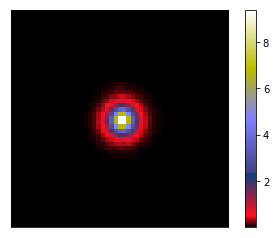

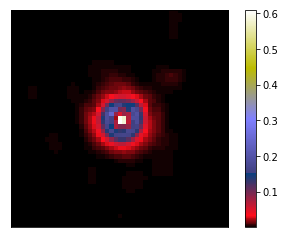

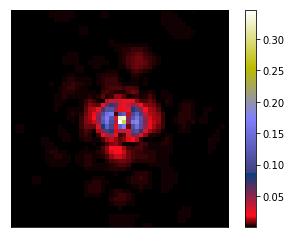

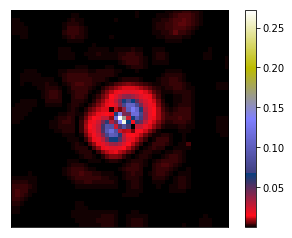

In [18]:
eigenPSFs = rca.utils.reg_format(S)
for epsf in eigenPSFs:
    plot_func(abs(epsf))

## Few examples

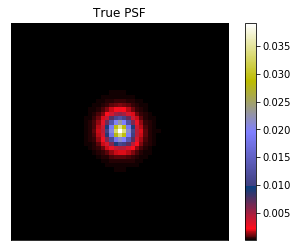

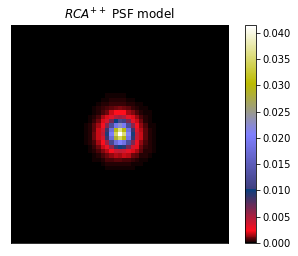

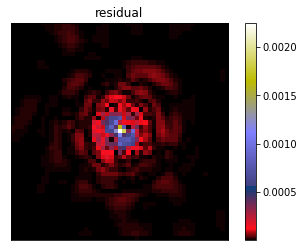

7


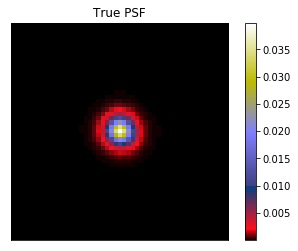

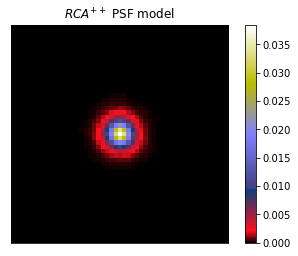

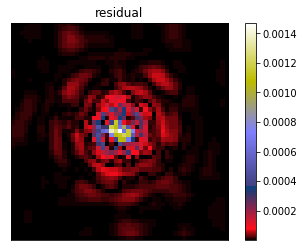

67


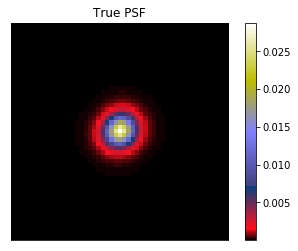

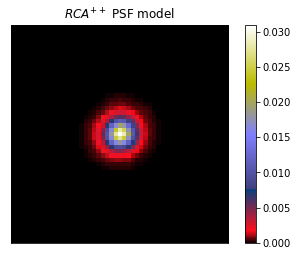

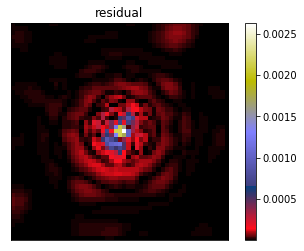

21


In [19]:
for j in np.random.choice(test_galaxies.shape[0], 3, False):
    true_psf = test_PSFs_truth[j]
    plot_func(true_psf, title='True PSF')
    est_psf = test_PSFs_estimate[j]
    plot_func(est_psf, title=r'$RCA^{++}$ PSF model')
    plot_func(np.abs(true_psf-est_psf), title='residual')
    print j